# Auto Loan Credit Decisioning Model


## Exploratory Data Analysis(EDA)

In [1]:
#Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data 
train_data= "Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv"
evaluation_data="Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv"
train = pd.read_csv(train_data)
test = pd.read_csv(evaluation_data)


In [19]:
# Datasets overview
print("Train dataset:")
print("Shape of train dataset:",train.shape)
print("\nData Types and Non-Null Counts:\n")
train.info()
print("\nSummary Statistics:\n")
print(train.describe().T)
print(train['bad_flag'].value_counts(normalize=True))

print("Evaluation dataset:")
print("shape of test dataset:",test.shape)
print("\nData Types and Non-Null Counts:\n")
test.info()
print("\nSummary Statistics:\n")
print(test.describe().T)

Train dataset:
Shape of train dataset: (21348, 43)

Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
Index: 21348 entries, 0 to 21605
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              21174 non-null  float64
 1   aprv_flag                         21348 non-null  object 
 2   amtfinanced_1req                  21348 non-null  float64
 3   collateral_dlrinput_newused_1req  21348 non-null  object 
 4   pti_1req                          21345 non-null  float64
 5   ltv_1req                          21343 non-null  float64
 6   p12_reh7120_a                     19484 non-null  float64
 7   p12_bcx7110_a                     17738 non-null  float64
 8   p12_all7170_a                     20695 non-null  float64
 9   p12_aut7110_a                     10924 non-null  float64
 10  p12_all7120_a                     20977 non-null  

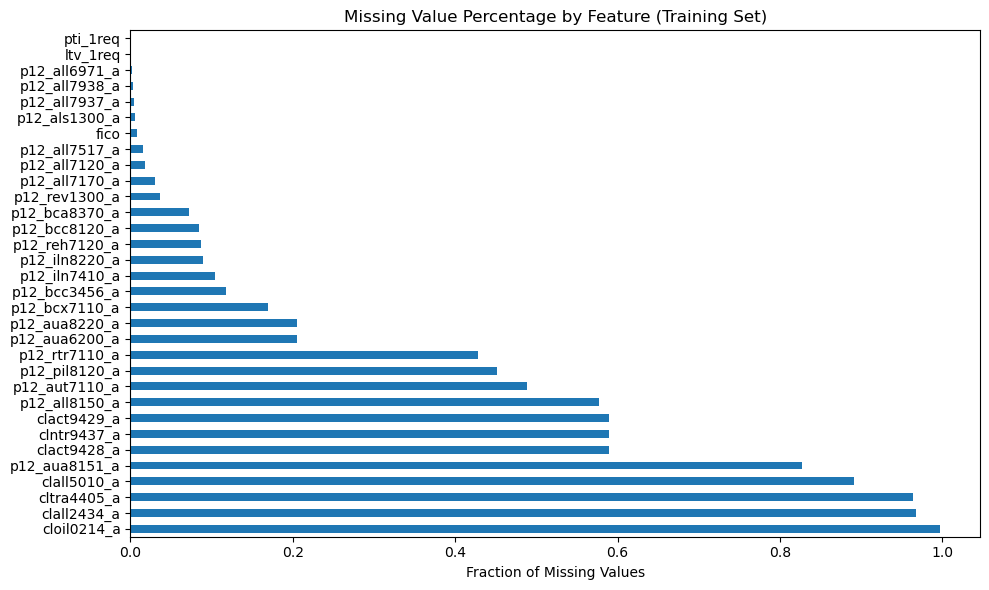

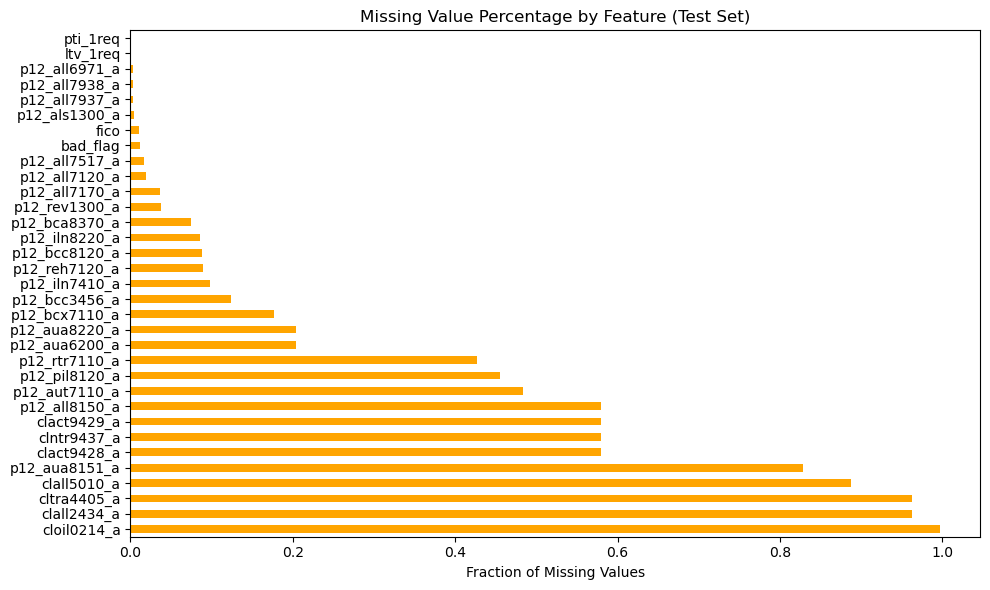

In [20]:
# Check and Visualize missing values (train and test data)


missing_train = train.isnull().mean().sort_values(ascending=False)
missing_test = test.isnull().mean().sort_values(ascending=False)

#Visualize missing values (train) data
plt.figure(figsize=(10, 6))
missing_train[missing_train > 0].plot(kind='barh') #only include columns with missing data
plt.title("Missing Value Percentage by Feature (Training Set)")
plt.xlabel("Fraction of Missing Values")
plt.tight_layout()
plt.show()

# Visualize missing values (test)
plt.figure(figsize=(10, 6))
missing_test[missing_test > 0].plot(kind='barh', color='orange')
plt.title("Missing Value Percentage by Feature (Test Set)")
plt.xlabel("Fraction of Missing Values")
plt.tight_layout()
plt.show()

          Feature  Train Missing %  Test Missing %  Correlation with bad_flag
0     cloil0214_a           99.663          99.667                     -0.164
1     clall2434_a           96.730          96.296                     -0.008
2     cltra4405_a           96.393          96.241                     -0.002
3     clall5010_a           89.100          88.759                      0.014
4   p12_aua8151_a           82.673          82.796                     -0.069
5     clntr9437_a           58.905          57.926                      0.117
6     clact9429_a           58.905          57.926                      0.109
7     clact9428_a           58.905          57.926                      0.114
8   p12_all8150_a           57.654          57.907                     -0.089
9   p12_aut7110_a           48.829          48.370                      0.057
10  p12_pil8120_a           45.189          45.519                     -0.058
11  p12_rtr7110_a           42.749          42.667              

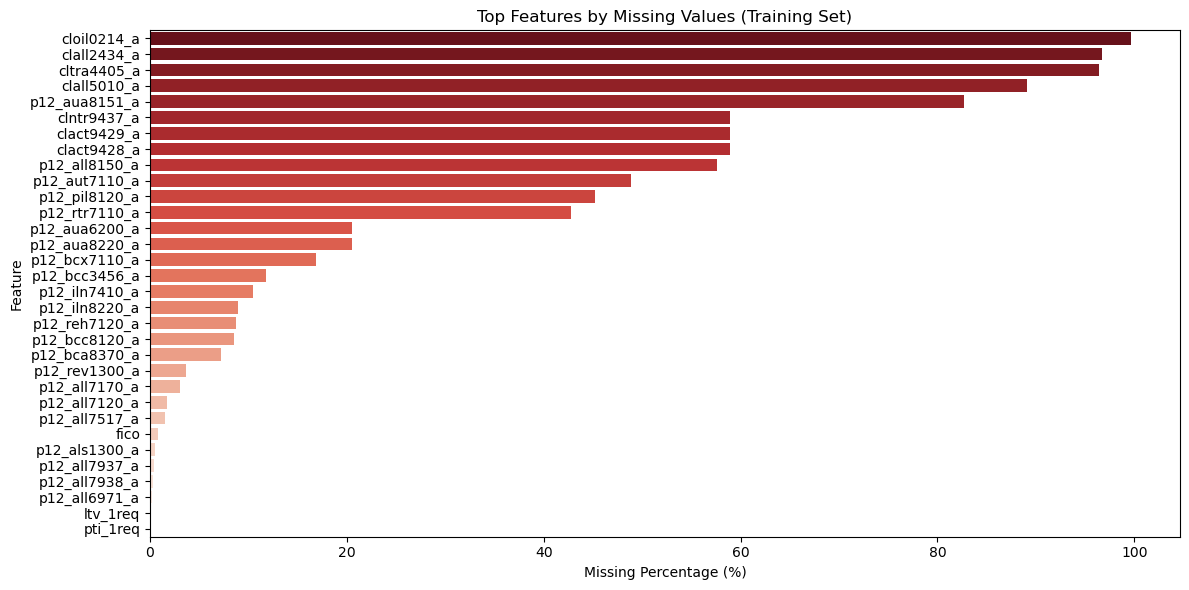

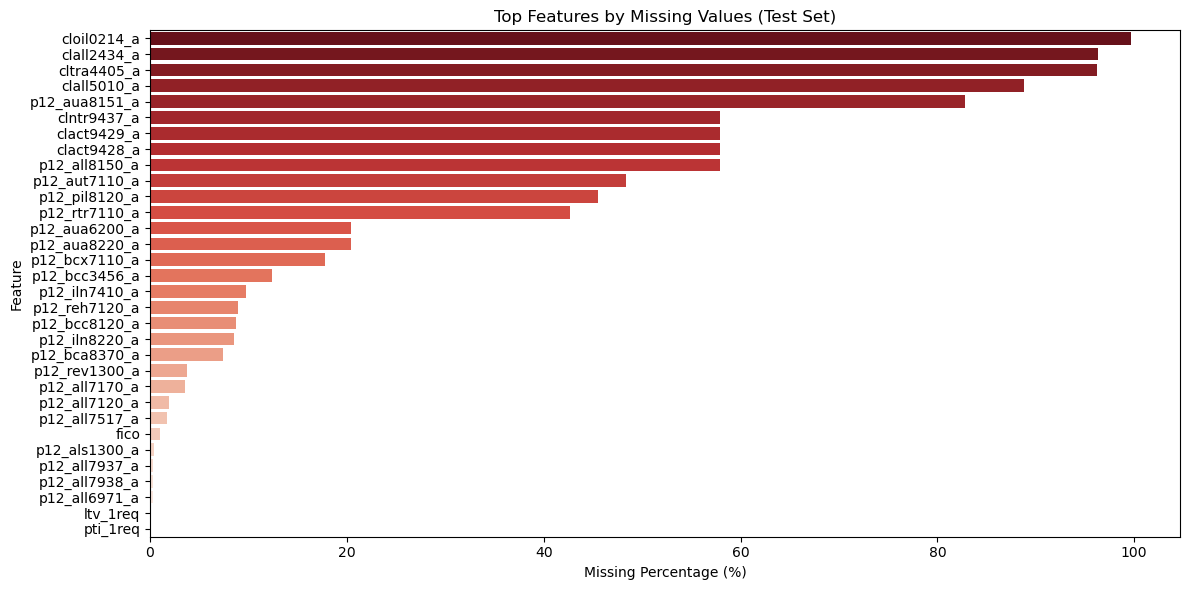

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Missing values analysis
## Select numeric columns
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
## Calculate missing percentages
missing_train = train[numeric_cols].isnull().mean() * 100
missing_test = test[numeric_cols].isnull().mean() * 100
# Correlation with target variable
correlation = train[numeric_cols].corrwith(train['bad_flag'])

# Combine into one DataFrame
summary = pd.DataFrame({
    'Feature': numeric_cols,
    'Train Missing %': missing_train.round(3),
    'Test Missing %': missing_test.round(3),
    'Correlation with bad_flag': correlation.round(3)
}).dropna()

# Filter: only features with missing values
summary = summary[(summary['Train Missing %'] > 0) | (summary['Test Missing %'] > 0)]

# Sort by Train Missing %
summary = summary.sort_values(by='Train Missing %', ascending=False).reset_index(drop=True)

print(summary.head(15))  # View top 10 rows


## Visualize Missing Value Percentages ----
plt.figure(figsize=(12, 6))
sns.barplot(
    y='Feature',
    x='Train Missing %',
    data=summary.sort_values(by='Train Missing %', ascending=False),
    palette='Reds_r'
)
plt.title("Top Features by Missing Values (Training Set)")
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    y='Feature',
    x='Test Missing %',
    data=summary.sort_values(by='Test Missing %', ascending=False),
    palette='Reds_r'
)
plt.title("Top Features by Missing Values (Test Set)")
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [22]:
print(summary) 

          Feature  Train Missing %  Test Missing %  Correlation with bad_flag
0     cloil0214_a           99.663          99.667                     -0.164
1     clall2434_a           96.730          96.296                     -0.008
2     cltra4405_a           96.393          96.241                     -0.002
3     clall5010_a           89.100          88.759                      0.014
4   p12_aua8151_a           82.673          82.796                     -0.069
5     clntr9437_a           58.905          57.926                      0.117
6     clact9429_a           58.905          57.926                      0.109
7     clact9428_a           58.905          57.926                      0.114
8   p12_all8150_a           57.654          57.907                     -0.089
9   p12_aut7110_a           48.829          48.370                      0.057
10  p12_pil8120_a           45.189          45.519                     -0.058
11  p12_rtr7110_a           42.749          42.667              

In [23]:
 print(summary.to_latex(index=False, float_format="%.3f"))



\begin{tabular}{lrrr}
\toprule
Feature & Train Missing % & Test Missing % & Correlation with bad_flag \\
\midrule
cloil0214_a & 99.663 & 99.667 & -0.164 \\
clall2434_a & 96.730 & 96.296 & -0.008 \\
cltra4405_a & 96.393 & 96.241 & -0.002 \\
clall5010_a & 89.100 & 88.759 & 0.014 \\
p12_aua8151_a & 82.673 & 82.796 & -0.069 \\
clntr9437_a & 58.905 & 57.926 & 0.117 \\
clact9429_a & 58.905 & 57.926 & 0.109 \\
clact9428_a & 58.905 & 57.926 & 0.114 \\
p12_all8150_a & 57.654 & 57.907 & -0.089 \\
p12_aut7110_a & 48.829 & 48.370 & 0.057 \\
p12_pil8120_a & 45.189 & 45.519 & -0.058 \\
p12_rtr7110_a & 42.749 & 42.667 & 0.076 \\
p12_aua6200_a & 20.494 & 20.370 & 0.079 \\
p12_aua8220_a & 20.494 & 20.370 & -0.087 \\
p12_bcx7110_a & 16.910 & 17.741 & 0.103 \\
p12_bcc3456_a & 11.748 & 12.426 & -0.102 \\
p12_iln7410_a & 10.423 & 9.778 & 0.066 \\
p12_iln8220_a & 8.980 & 8.519 & -0.062 \\
p12_reh7120_a & 8.731 & 8.963 & 0.071 \\
p12_bcc8120_a & 8.493 & 8.759 & -0.038 \\
p12_bca8370_a & 7.261 & 7.444 & -0.09

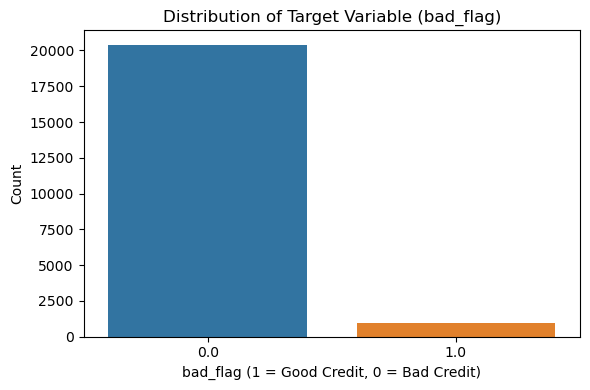

In [24]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='bad_flag', data=train)
plt.title("Distribution of Target Variable (bad_flag)")
plt.xlabel("bad_flag (1 = Good Credit, 0 = Bad Credit)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [25]:
# Get number of unique values for each feature (TRAIN)
unique_vals = train.nunique().sort_values(ascending=False)
unique_df = unique_vals.reset_index()
unique_df.columns = ['Feature', 'Unique Values']
print(unique_df) 
print(unique_df.to_latex(index=False, float_format="%.3f"))

# Get number of unique values for each feature (TEST)
unique_vals_t = test.nunique().sort_values(ascending=False)
unique_df_t = unique_vals_t.reset_index()
unique_df_t.columns = ['Feature', 'Unique Values']
print(unique_df_t)  # Preview
print(unique_df_t.to_latex(index=False, float_format="%.3f"))

                             Feature  Unique Values
0                   amtfinanced_1req          16804
1                           ltv_1req           7849
2                           pti_1req           2118
3                        clall5010_a           1035
4                               fico            444
5                      p12_iln8220_a            377
6                      p12_bca8370_a            351
7                      p12_bcc8120_a            330
8                      p12_all7120_a            282
9                      p12_pil8120_a            254
10                     p12_all8370_a            248
11                     p12_aua8220_a            237
12                     p12_reh7120_a            169
13                     p12_bcx7110_a            135
14                     p12_rtr7110_a            131
15                     p12_aut7110_a            109
16                     p12_all7170_a            101
17                     p12_all7937_a             96
18          

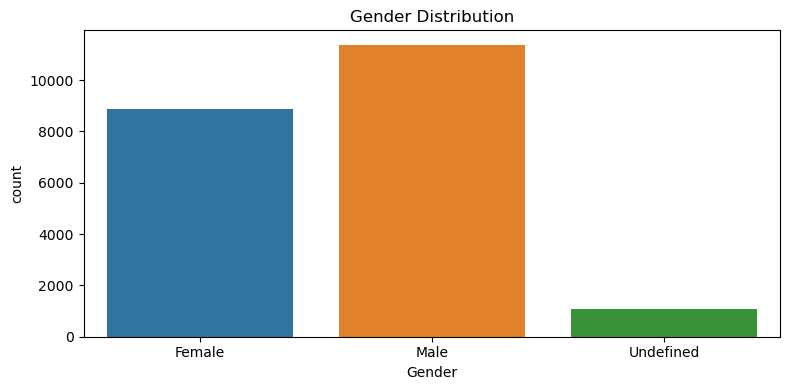

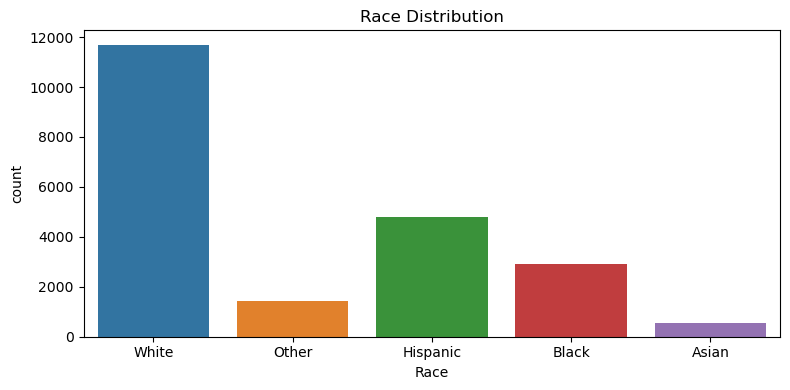

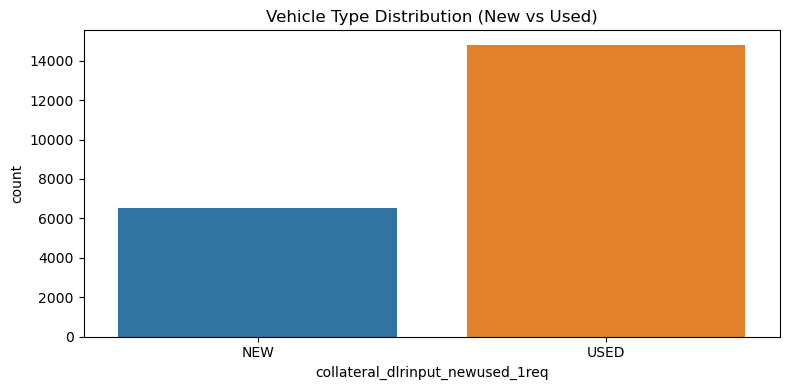

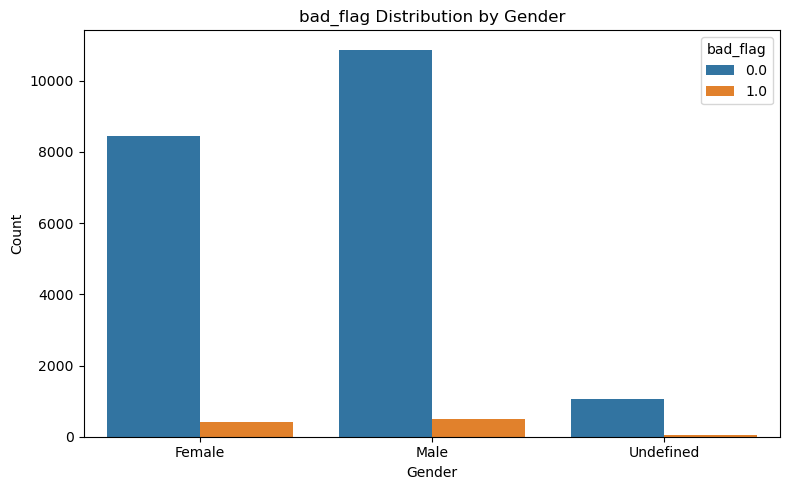

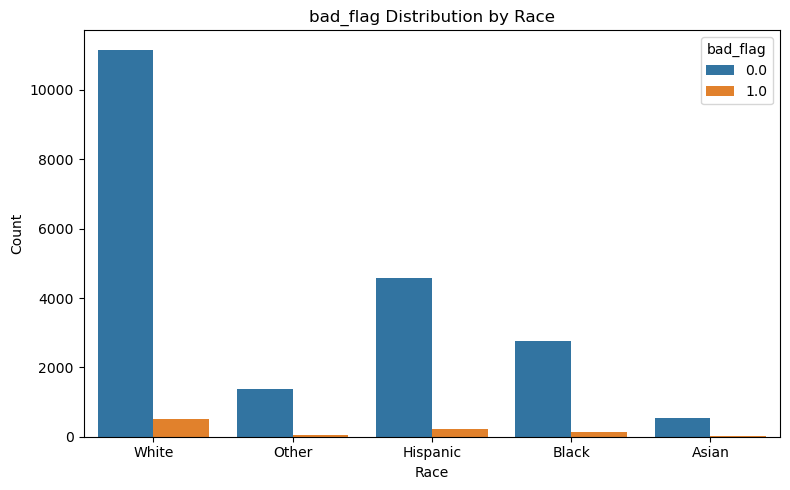

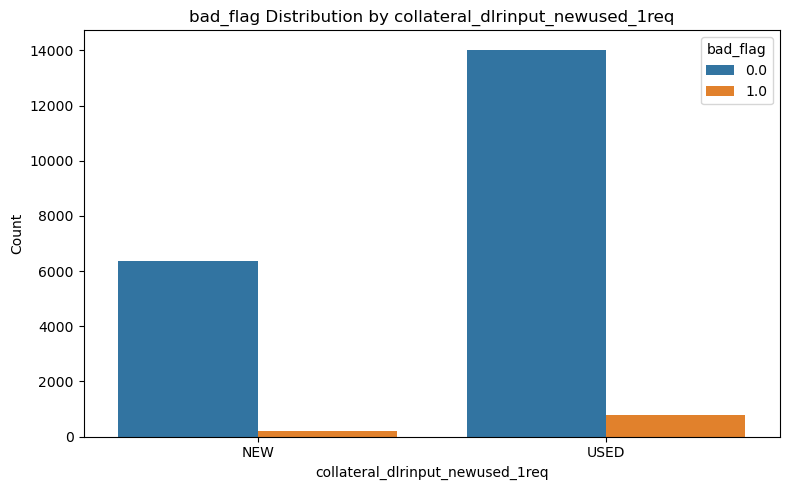

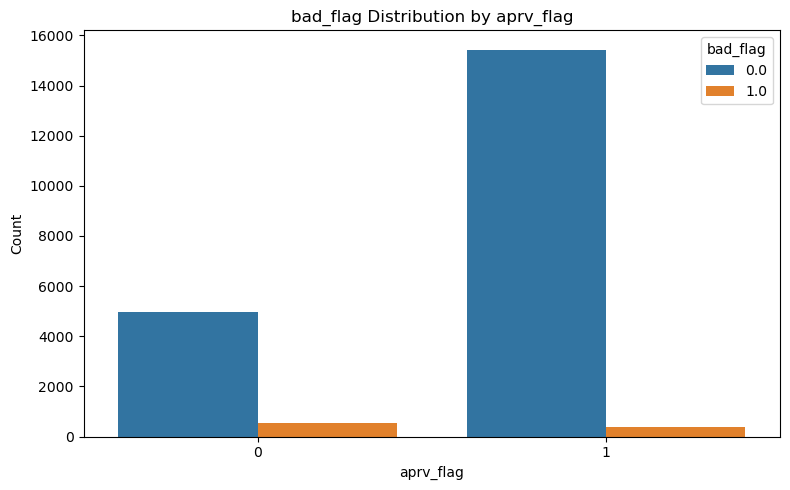

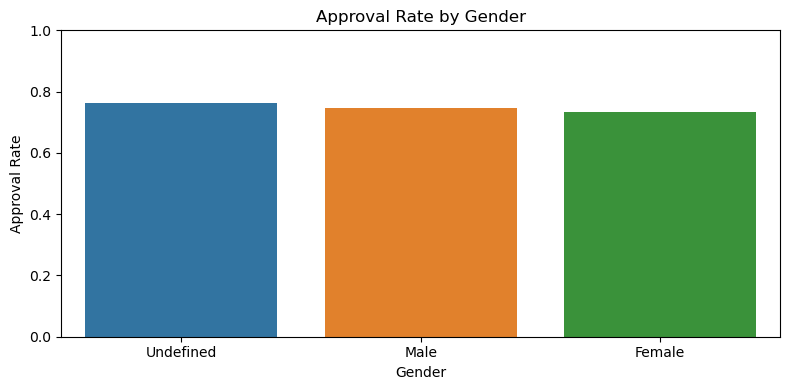


Approval Rates by Gender:
Gender
Undefined    0.763
Male         0.747
Female       0.732
Name: aprv_flag, dtype: float64


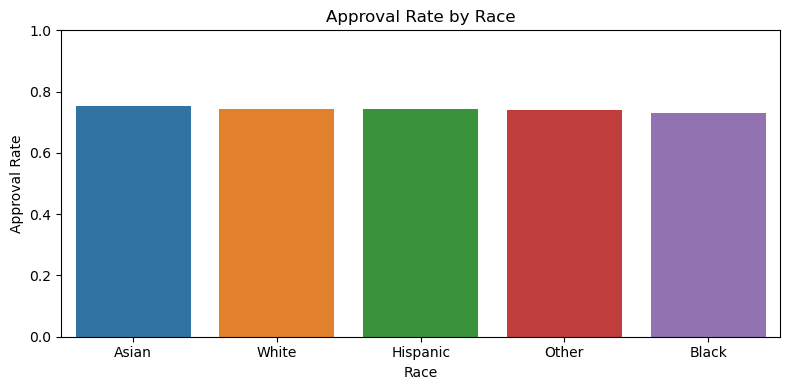


Approval Rates by Race:
Race
Asian       0.752
White       0.744
Hispanic    0.742
Other       0.739
Black       0.729
Name: aprv_flag, dtype: float64


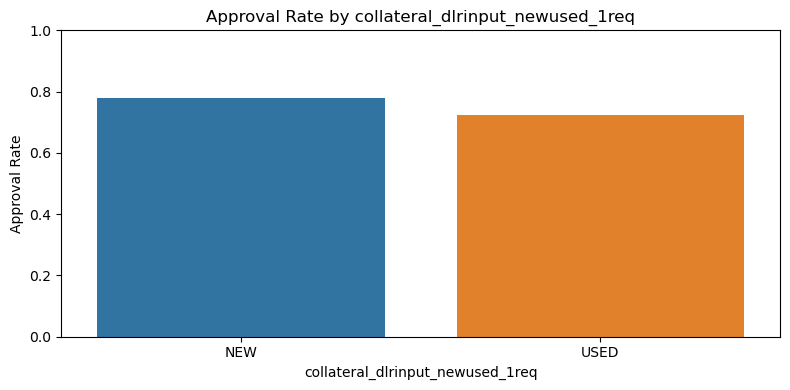


Approval Rates by collateral_dlrinput_newused_1req:
collateral_dlrinput_newused_1req
NEW     0.779
USED    0.725
Name: aprv_flag, dtype: float64


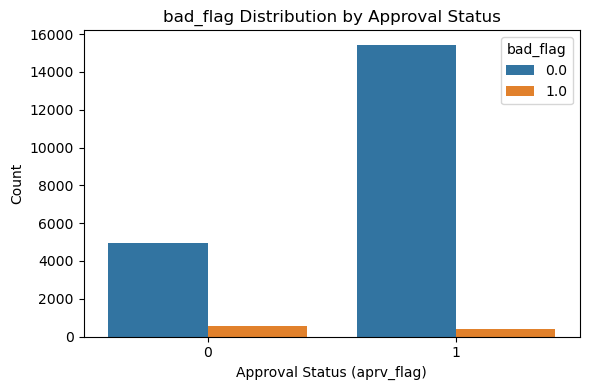

In [26]:
## Categorical feature distributions

# Drop rows where bad_flag or aprv_flag is NA to ensure clean plotting
train= train[train['bad_flag'].notna() & train['aprv_flag'].notna()].copy()
train['bad_flag'] = train['bad_flag'].astype(str)  
train['aprv_flag'] = train['aprv_flag'].astype(str)

# Gender Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=train)
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

# Race Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Race', data=train)
plt.title("Race Distribution")
plt.tight_layout()
plt.show()

# Vehicle Type Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='collateral_dlrinput_newused_1req', data=train)
plt.title("Vehicle Type Distribution (New vs Used)")
plt.tight_layout()
plt.show()

# Categorical features vs bad_flag (bi-variate analysis with grouped bar plots)
categorical_features = ['Gender', 'Race', 'collateral_dlrinput_newused_1req', 'aprv_flag']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='bad_flag', data=train)
    plt.title(f"bad_flag Distribution by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='bad_flag', loc='upper right')
    plt.tight_layout()
    plt.show()

#Approval rate (aprv_flag = 1) by category
approval_features = ['Gender', 'Race', 'collateral_dlrinput_newused_1req']

for feature in approval_features:
    approval_rate = train.groupby(feature)['aprv_flag'].apply(lambda x: (x == '1').mean()).sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=approval_rate.index, y=approval_rate.values)
    plt.title(f"Approval Rate by {feature}")
    plt.ylabel("Approval Rate")
    plt.xlabel(feature)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    print(f"\nApproval Rates by {feature}:")
    print(approval_rate.round(3))

#aprv_flag vs bad_flag bi-variate plot
plt.figure(figsize=(6, 4))
sns.countplot(x='aprv_flag', hue='bad_flag', data=train)
plt.title("bad_flag Distribution by Approval Status")
plt.xlabel("Approval Status (aprv_flag)")
plt.ylabel("Count")
plt.legend(title='bad_flag')
plt.tight_layout()
plt.show()


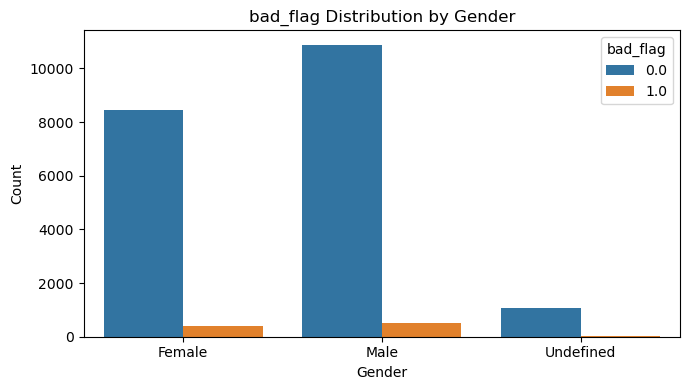

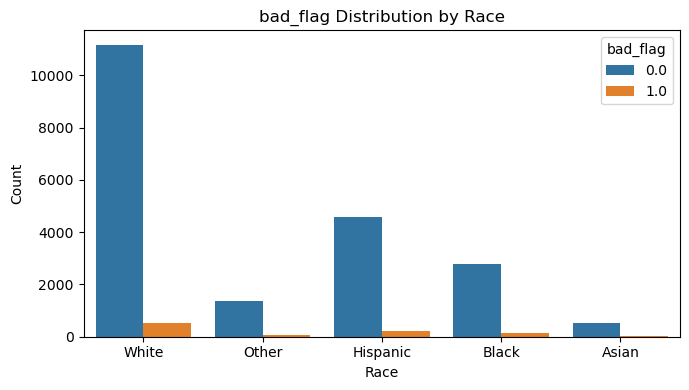

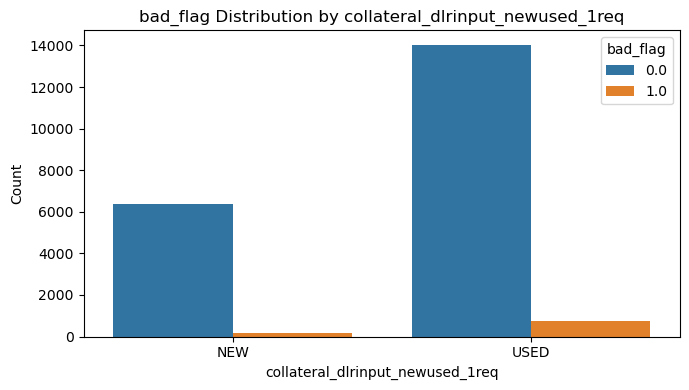

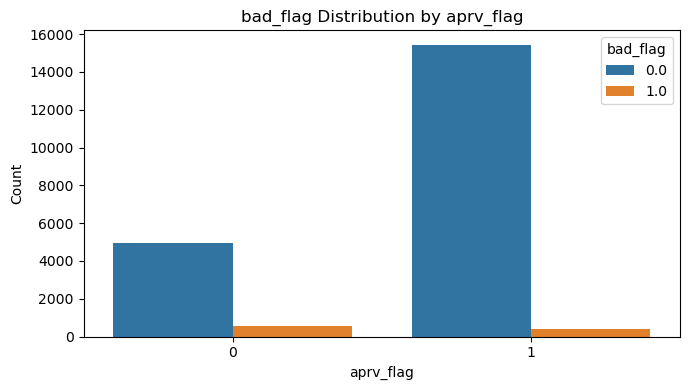

In [27]:
train = train.copy() 
train['bad_flag'] = train['bad_flag'].astype(str)
train['aprv_flag'] = train['aprv_flag'].astype(str)

# SECTION 4: Categorical Features vs Target
categorical_features = ['Gender', 'Race', 'collateral_dlrinput_newused_1req', 'aprv_flag']
for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=feature, hue='bad_flag', data=train)
    plt.title(f'bad_flag Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='bad_flag')
    plt.tight_layout()
    plt.show()




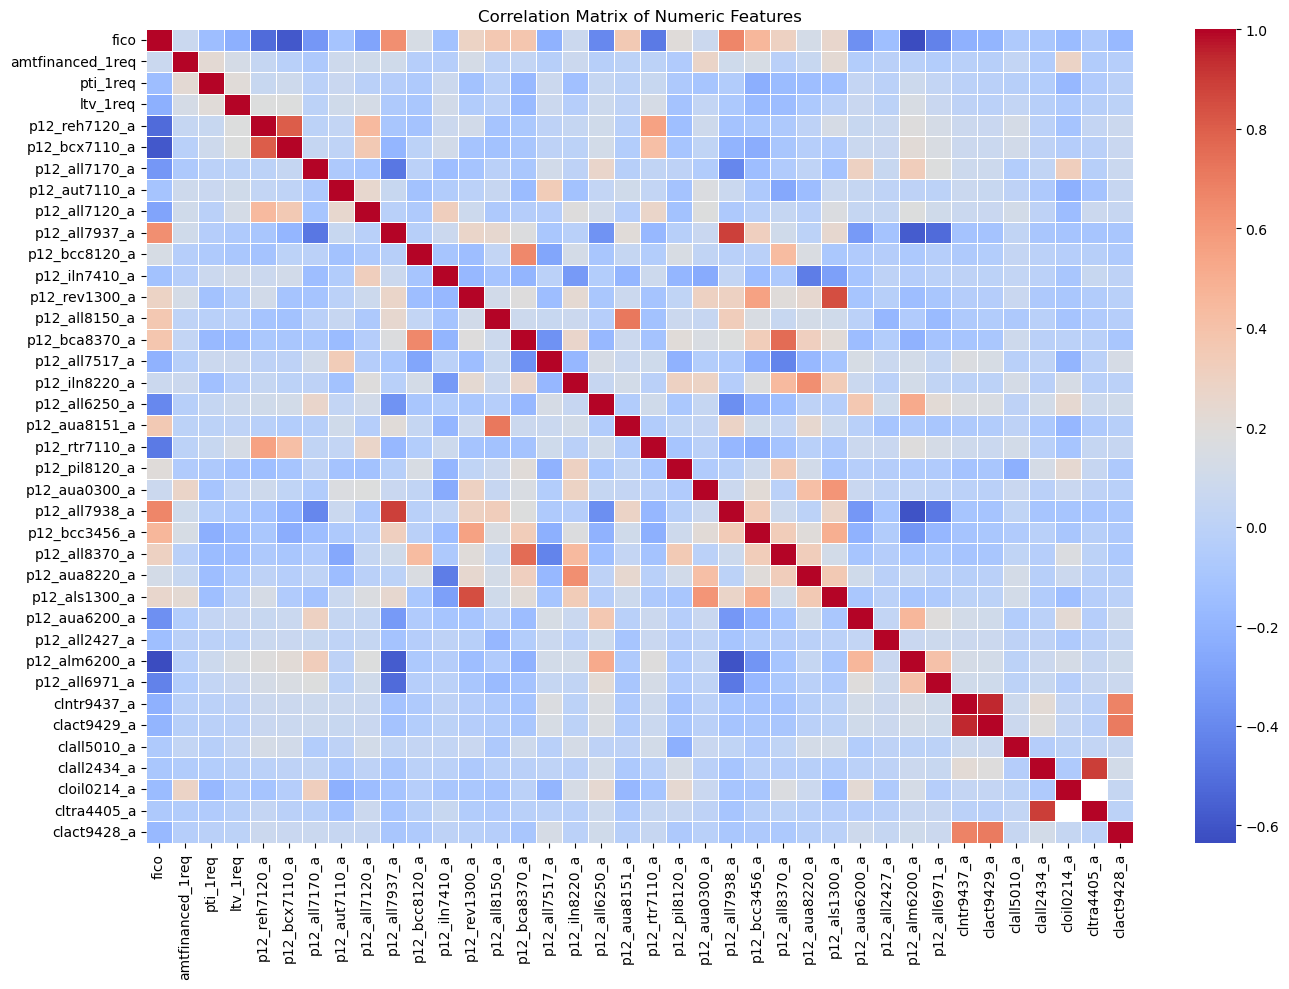

             Feature  Correlation with bad_flag
0               fico                  -0.196779
35       cloil0214_a                  -0.164054
22     p12_all7938_a                  -0.142104
9      p12_all7937_a                  -0.139328
31       clntr9437_a                   0.117015
37       clact9428_a                   0.113854
29     p12_alm6200_a                   0.111715
32       clact9429_a                   0.108775
5      p12_bcx7110_a                   0.102838
23     p12_bcc3456_a                  -0.101952
15     p12_all7517_a                   0.099297
14     p12_bca8370_a                  -0.098042
26     p12_als1300_a                  -0.096906
17     p12_all6250_a                   0.096294
12     p12_rev1300_a                  -0.096154
13     p12_all8150_a                  -0.089072
25     p12_aua8220_a                  -0.087431
30     p12_all6971_a                   0.084555
6      p12_all7170_a                   0.083170
3           ltv_1req                   0

In [30]:
##Correlation 

# Select numeric features
numeric_df = train.select_dtypes(include=['float64', 'int64'])
# Remove constant columns and all-NaN columns
numeric_df = numeric_df.loc[:, numeric_df.std() != 0]  # remove zero variance
numeric_df = numeric_df.dropna(axis=1, how='all')      # remove all-NaN

##Correlation Matrix
corr_matrix = numeric_df.corr().round(3)
#print("Correlation matrix:",corr_matrix)
##heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("correlation_matrix.png")  # Save to file
plt.show()

# Correlation with Target Variable
# ----------------------------
corr_with_target = numeric_df.corrwith(train['bad_flag'])
corr_target_df = pd.DataFrame({
    'Feature': corr_with_target.index,
    'Correlation with bad_flag': corr_with_target.values
}).sort_values(by='Correlation with bad_flag', key=abs, ascending=False)

corr_target_df.to_csv("correlation_with_bad_flag.csv", index=False)
print(corr_target_df)




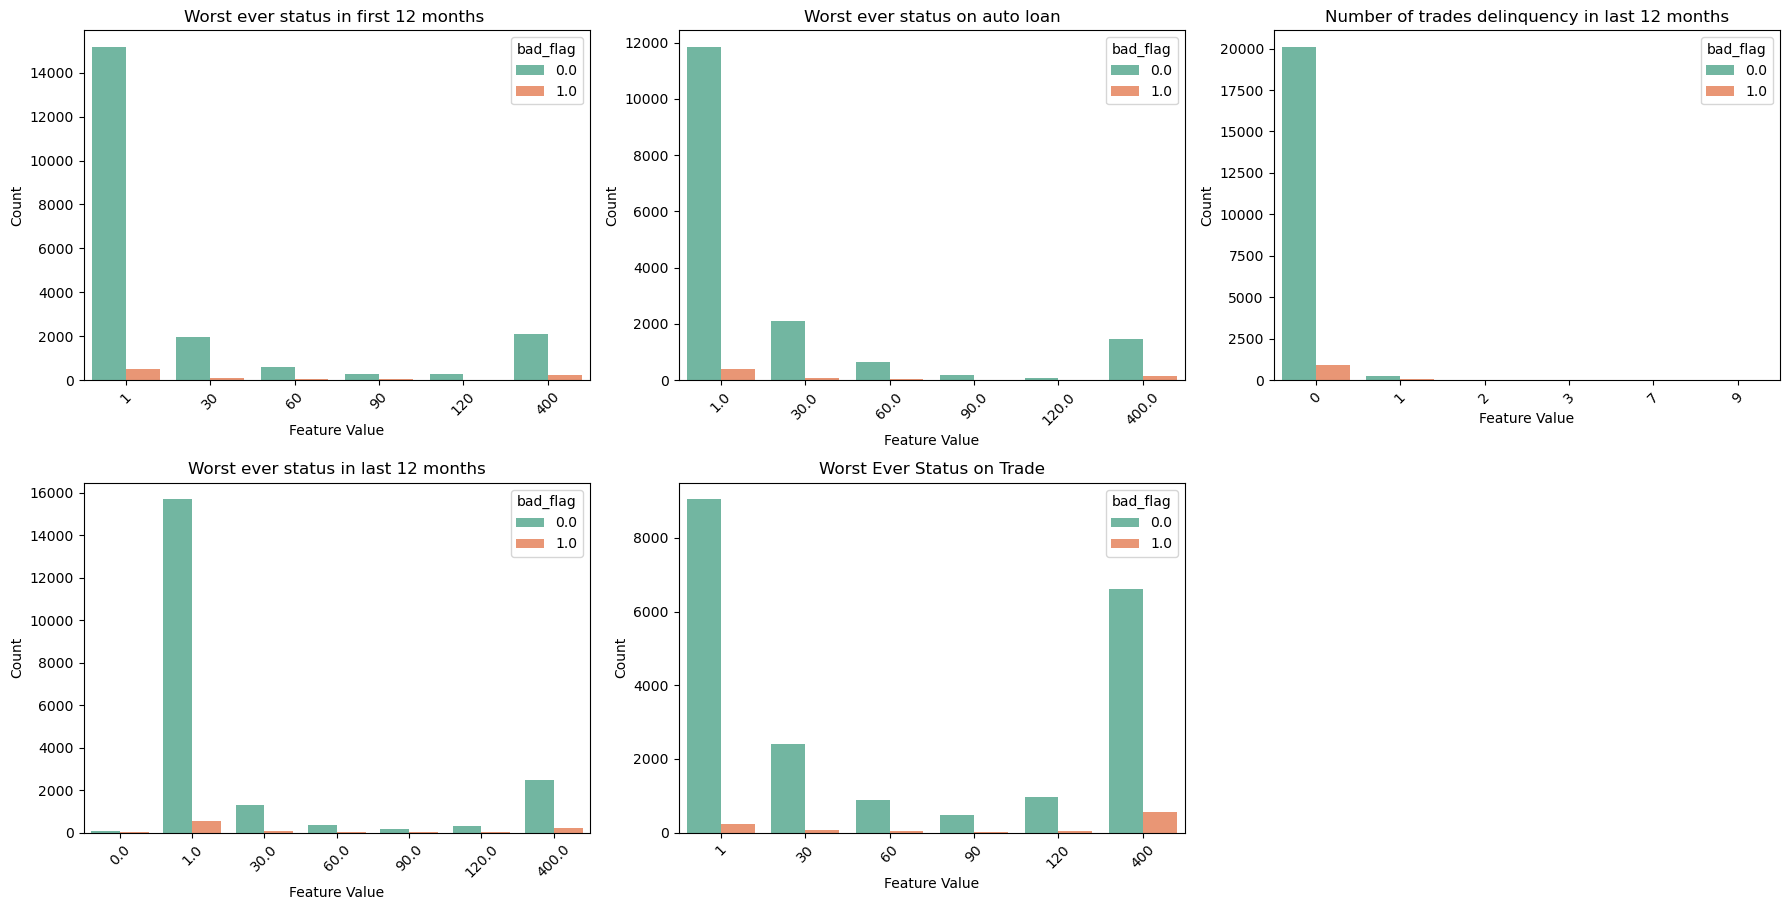

In [34]:
#freqquency-based features
#chosen 5 frequency-based features
freq_features = [
    'p12_all6250_a',
    'p12_aua6200_a',
    'p12_all2427_a',
    'p12_all6971_a',
    'p12_alm6200_a'
]
custom_titles = {
    'p12_all6250_a': "Worst ever status in first 12 months ",
    'p12_aua6200_a': "Worst ever status on auto loan",
    'p12_all2427_a': "Number of trades delinquency in last 12 months",
    'p12_all6971_a': "Worst ever status in last 12 months",
    'p12_alm6200_a': "Worst Ever Status on Trade"
}

train['bad_flag'] = train['bad_flag'].astype(str)

# --- Plot each as a countplot grouped by bad_flag ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(freq_features):
    sns.countplot(data=train, x=feature, hue='bad_flag', ax=axes[i], palette='Set2')
    axes[i].set_title(custom_titles.get(feature, feature))
    axes[i].set_xlabel("Feature Value")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused plot if only 5 features
for j in range(len(freq_features), 6):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("freq_features_countplots.png", dpi=300)
plt.show()


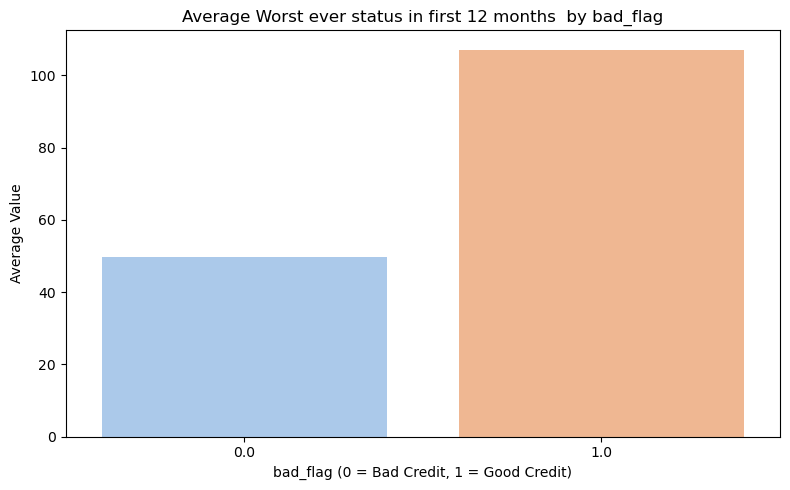

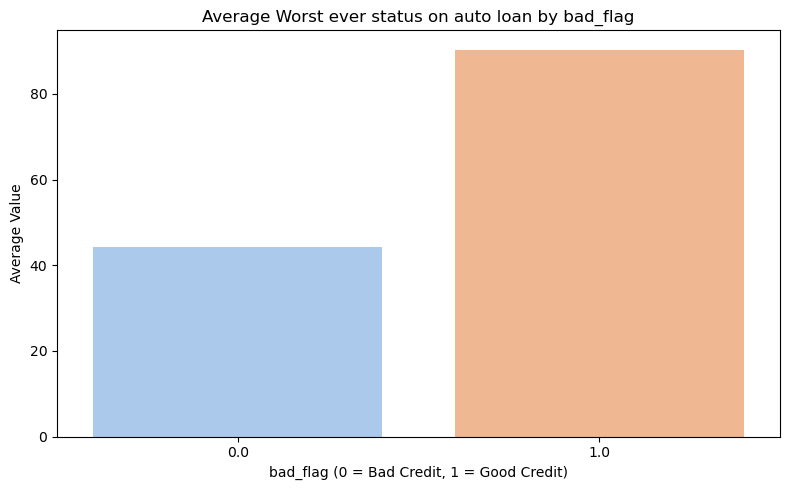

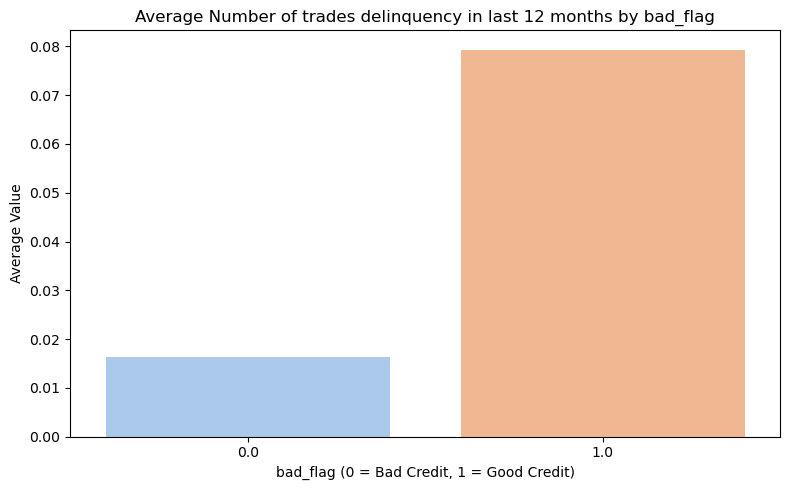

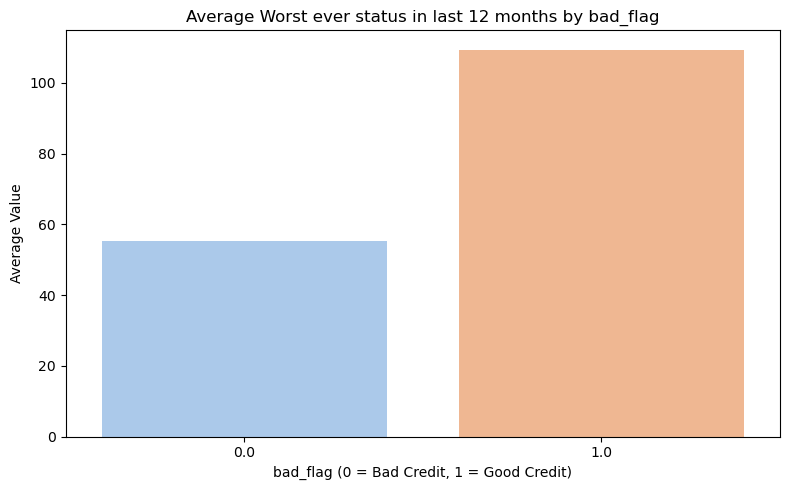

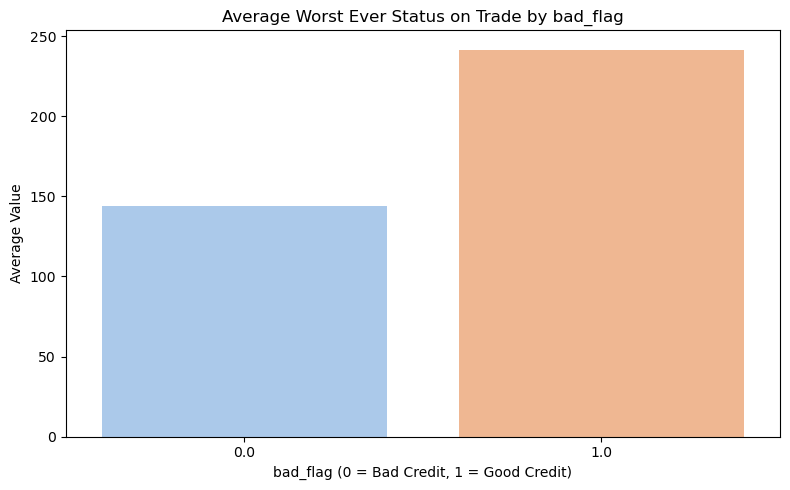

In [35]:
for feature in freq_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='bad_flag', y=feature, data=train, ci=None, estimator='mean', palette='pastel')
    plt.title(f"Average {custom_titles.get(feature, feature)} by bad_flag")
    plt.xlabel("bad_flag (0 = Bad Credit, 1 = Good Credit)")
    plt.ylabel("Average Value")
    plt.tight_layout()
    plt.show()


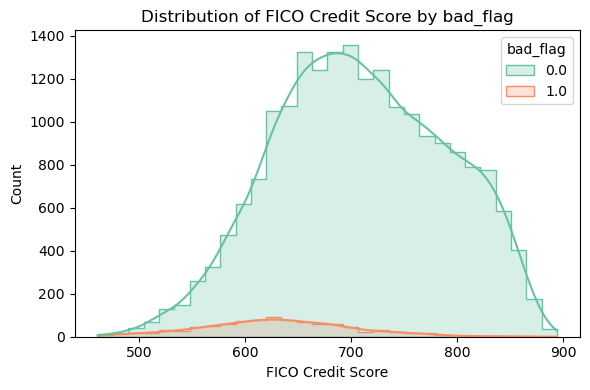

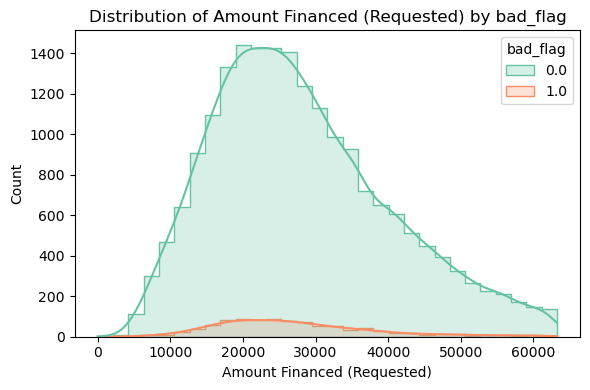

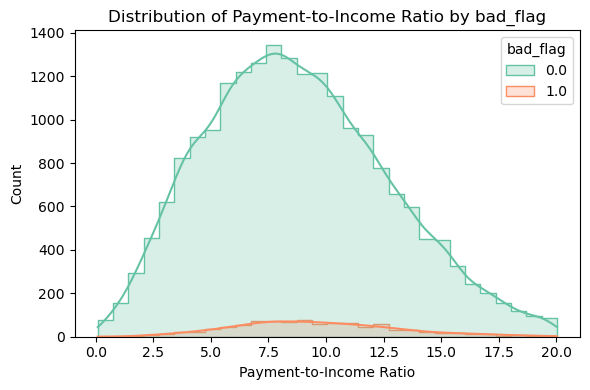

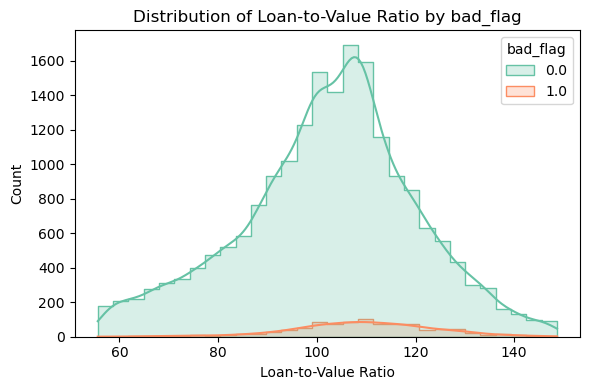

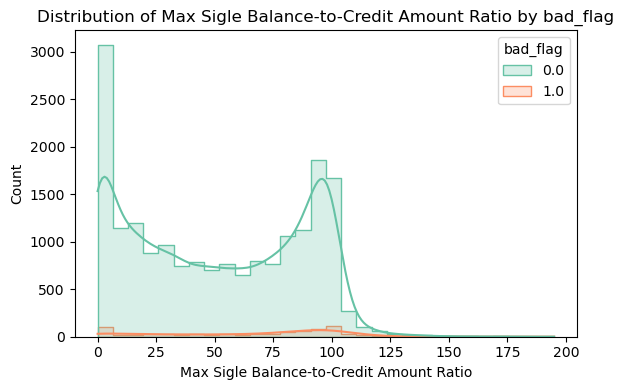

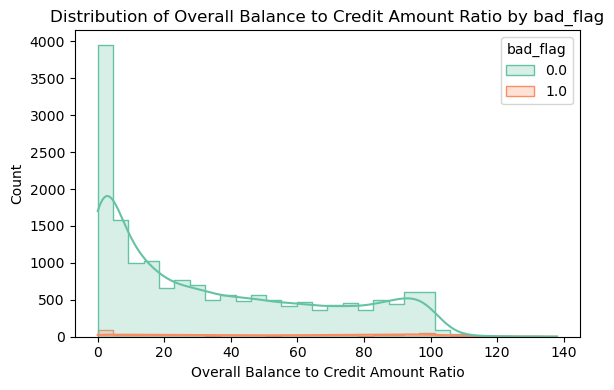

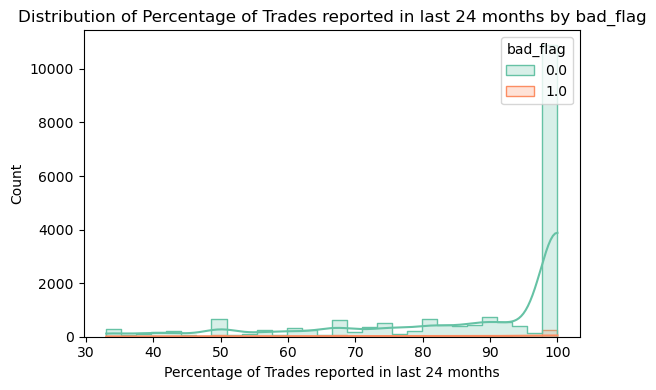

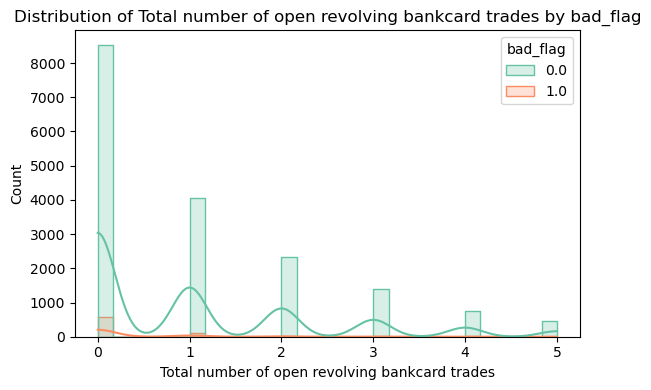

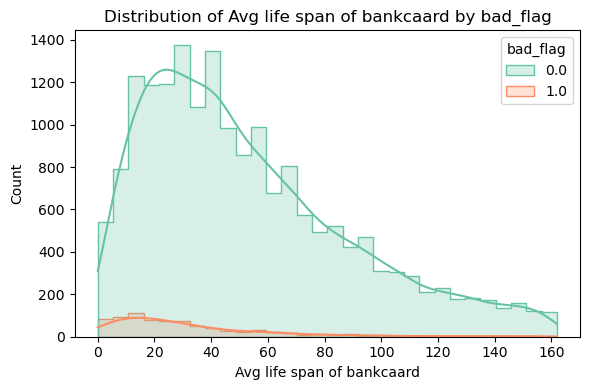

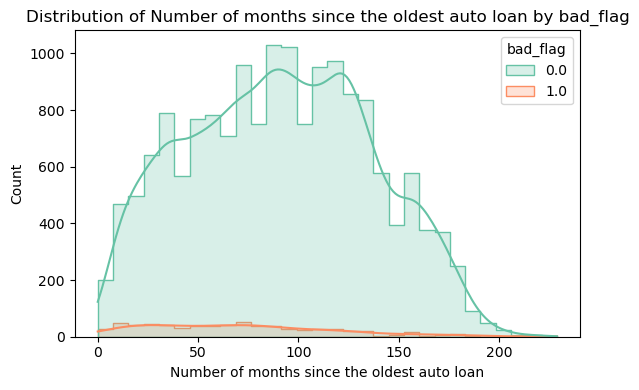

In [37]:
##Continuous/numerical feature analysis 
continuous_features = ['fico', 'amtfinanced_1req', 'pti_1req', 'ltv_1req','p12_reh7120_a','p12_bcx7110_a','p12_all7938_a','p12_bcc3456_a','p12_bca8370_a','p12_aua8220_a']

# Custom plot titles for each
custom_titles = {
    'fico': "FICO Credit Score",
    'amtfinanced_1req': "Amount Financed (Requested)",
    'pti_1req': "Payment-to-Income Ratio",
    'ltv_1req': "Loan-to-Value Ratio",
    'p12_reh7120_a':"Max Sigle Balance-to-Credit Amount Ratio",
    'p12_bcx7110_a':"Overall Balance to Credit Amount Ratio",
    'p12_all7938_a':"Percentage of Trades reported in last 24 months",
    'p12_bcc3456_a':"Total number of open revolving bankcard trades",
    'p12_bca8370_a':"Avg life span of bankcaard",
    'p12_aua8220_a':"Number of months since the oldest auto loan"
}
# Remove outliers using IQR
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[feature] >= Q1 - 1.5 * IQR) & (data[feature] <= Q3 + 1.5 * IQR)]

train['bad_flag'] = train['bad_flag'].astype(str)
for feature in continuous_features:
    clean_df = remove_outliers_iqr(df_train, feature)
    plt.figure(figsize=(6, 4))
    sns.histplot(data=clean_df, x=feature, hue='bad_flag', kde=True, bins=30, palette='Set2', element='step')
    plt.title(f"Distribution of {custom_titles[feature]} by bad_flag")
    plt.xlabel(custom_titles[feature])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [40]:
#???????

In [38]:
# Group-level fairness analysis
gender_bias = train.groupby('Gender')['bad_flag'].apply(lambda x: (x == '1').mean())
race_bias = train.groupby('Race')['bad_flag'].apply(lambda x: (x == '1').mean())
vehicle_bias = train.groupby('collateral_dlrinput_newused_1req')['bad_flag'].apply(lambda x: (x == '1').mean())

print("\nApproval Rate (bad_flag = 1) by Gender:\n", gender_bias.round(3))
print("\nApproval Rate (bad_flag = 1) by Race:\n", race_bias.round(3))
print("\nApproval Rate (bad_flag = 1) by Vehicle Type:\n", vehicle_bias.round(3))



Approval Rate (bad_flag = 1) by Gender:
 Gender
Female       0.0
Male         0.0
Undefined    0.0
Name: bad_flag, dtype: float64

Approval Rate (bad_flag = 1) by Race:
 Race
Asian       0.0
Black       0.0
Hispanic    0.0
Other       0.0
White       0.0
Name: bad_flag, dtype: float64

Approval Rate (bad_flag = 1) by Vehicle Type:
 collateral_dlrinput_newused_1req
NEW     0.0
USED    0.0
Name: bad_flag, dtype: float64


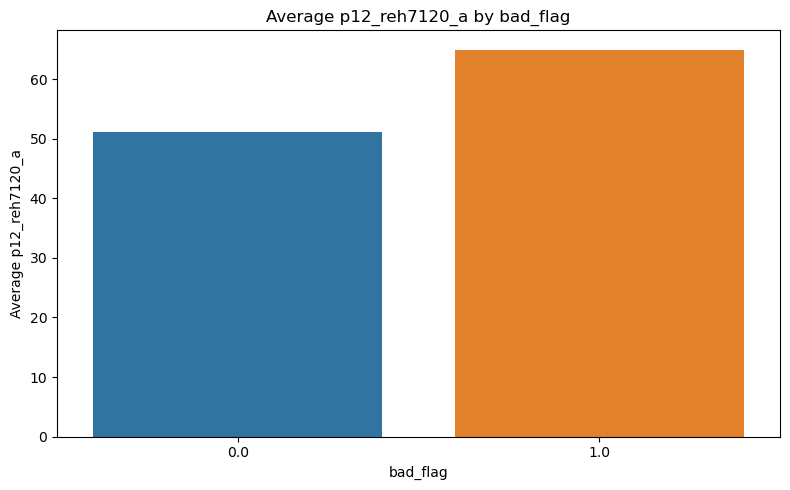

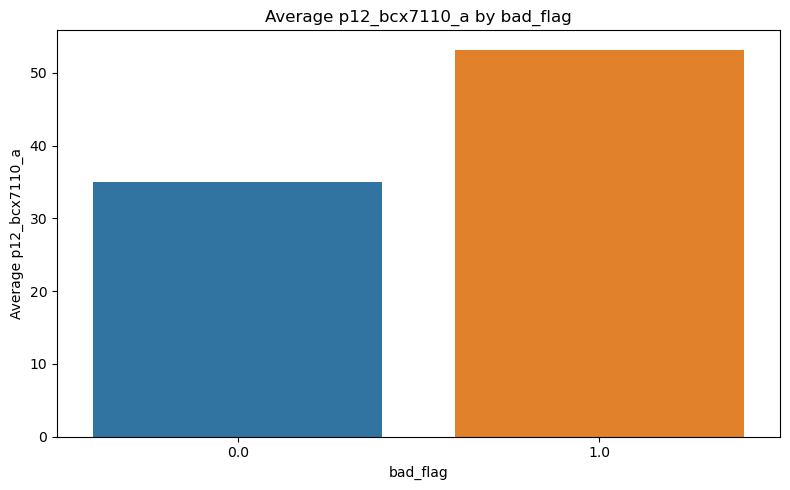

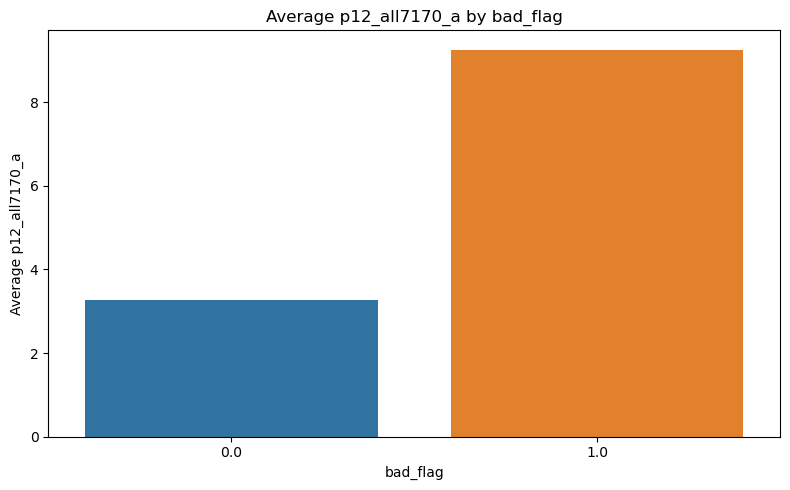

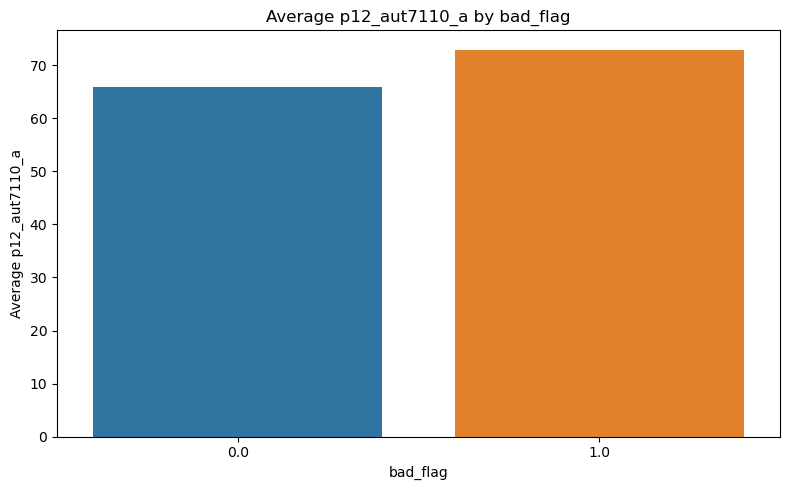

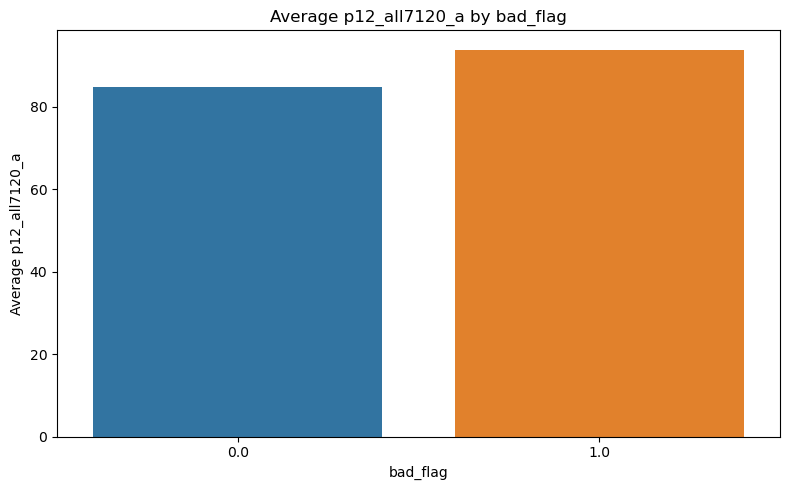

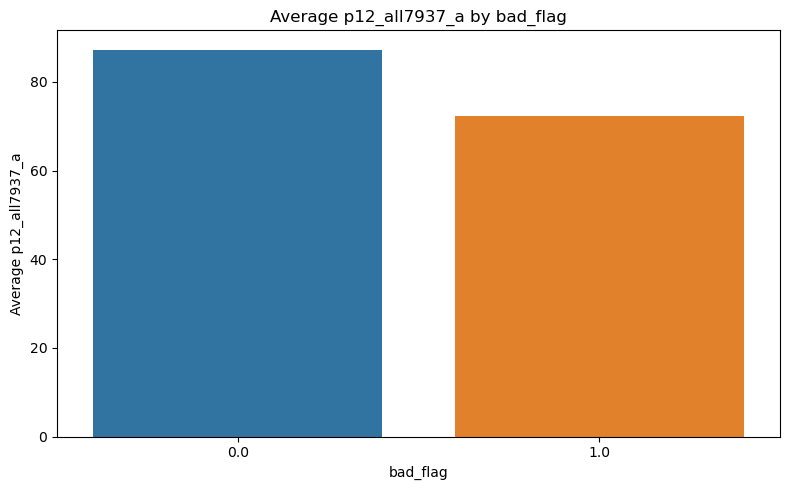

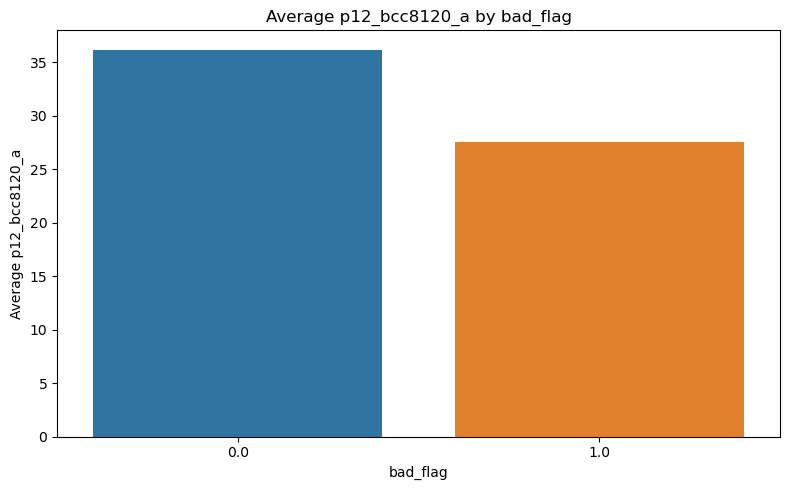

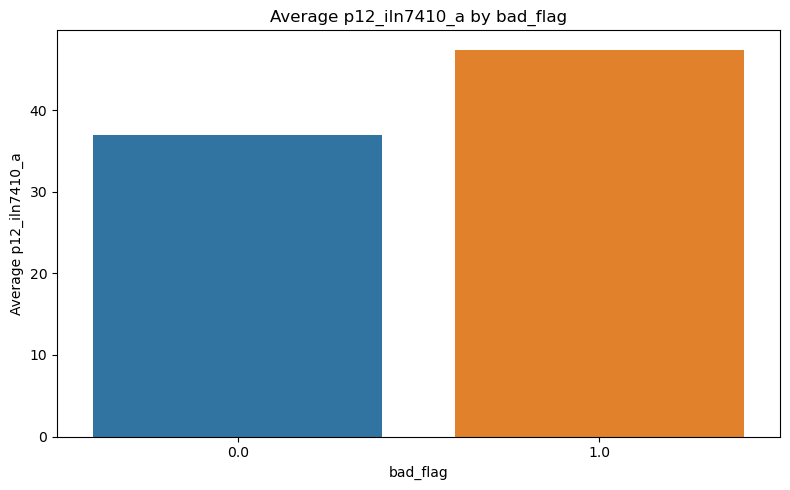

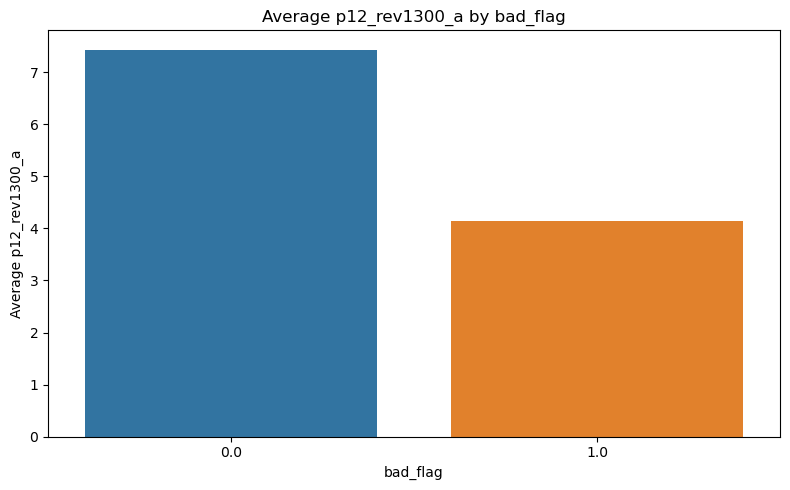

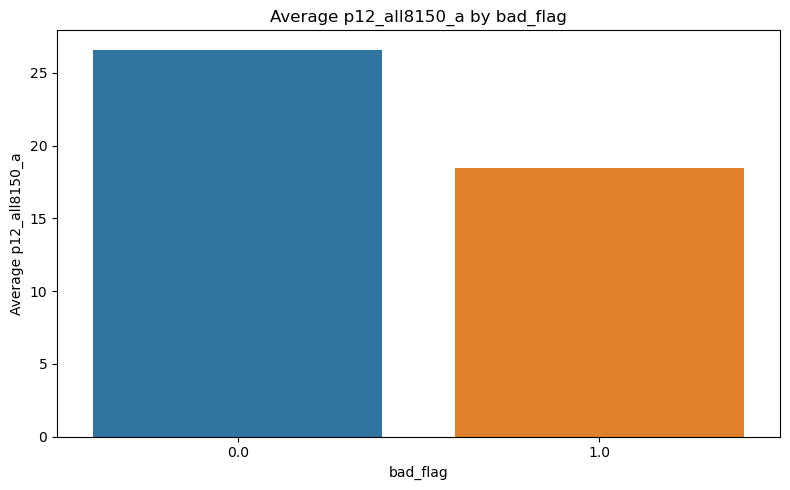

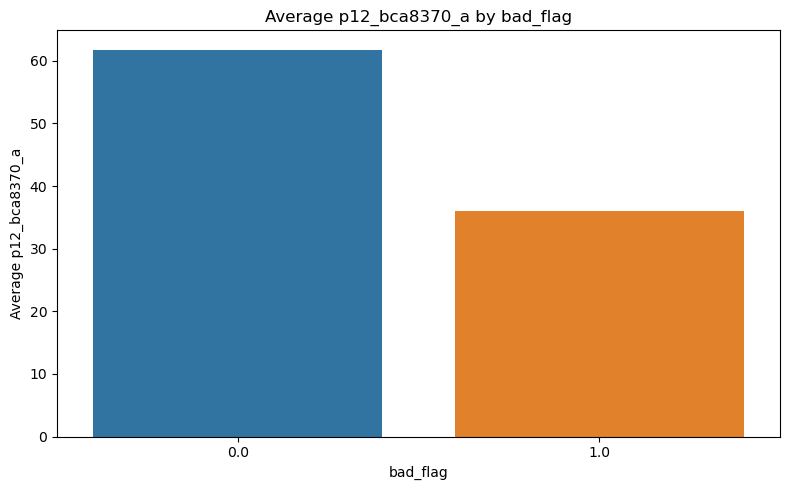

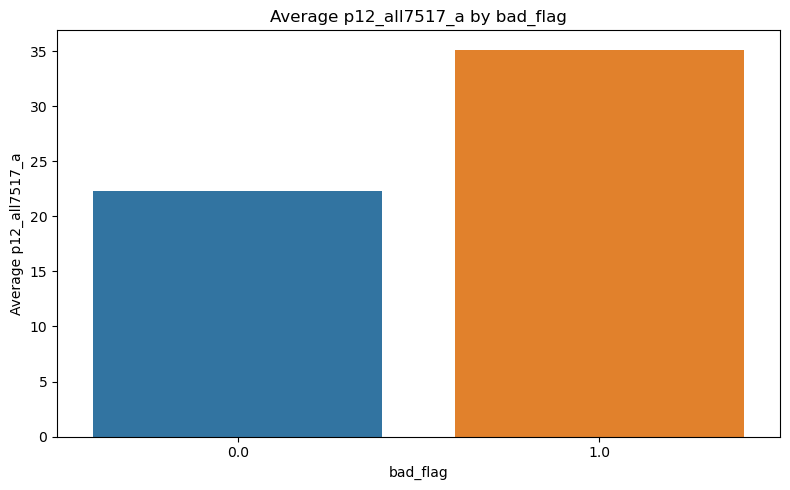

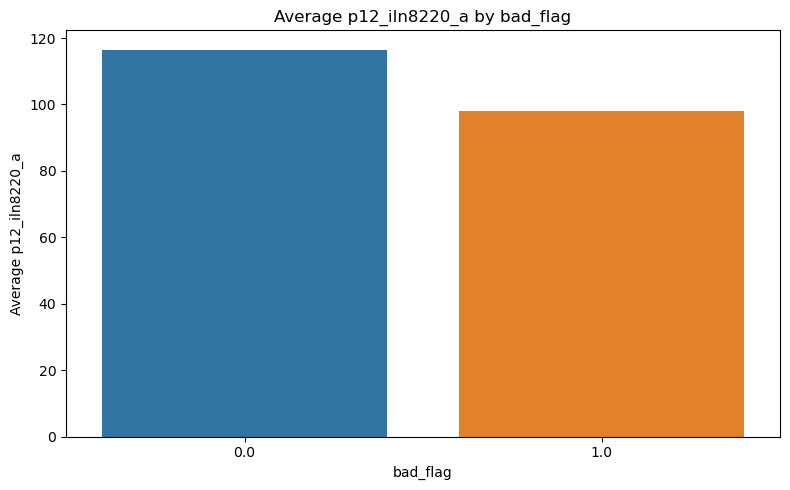

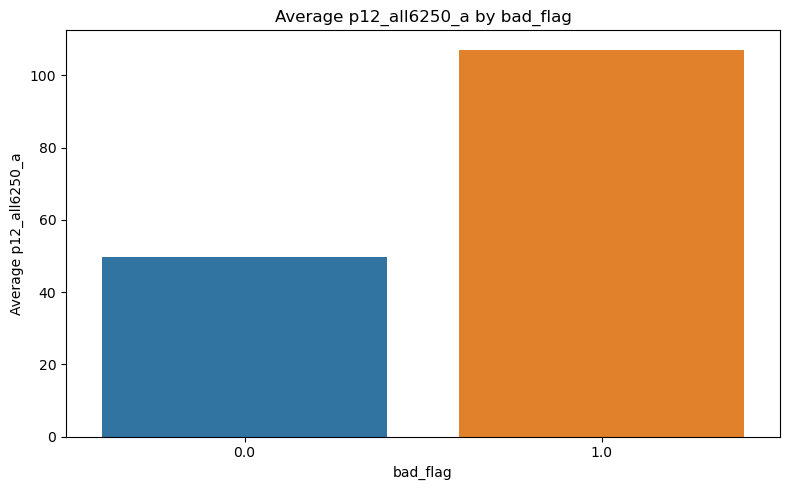

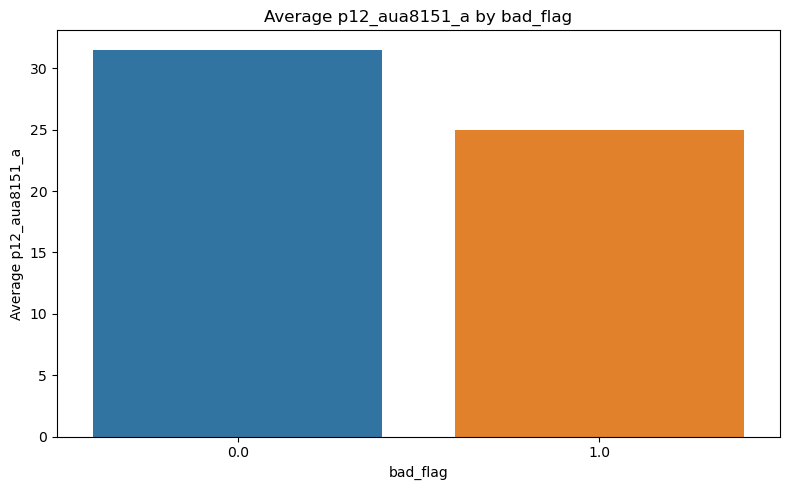

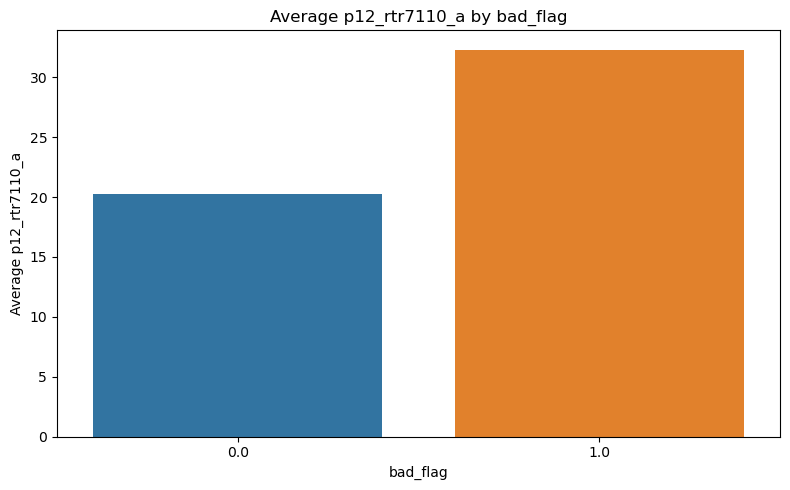

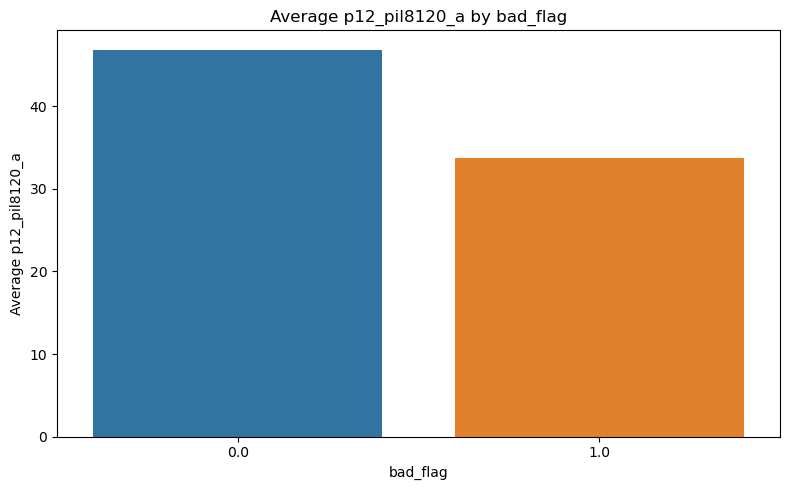

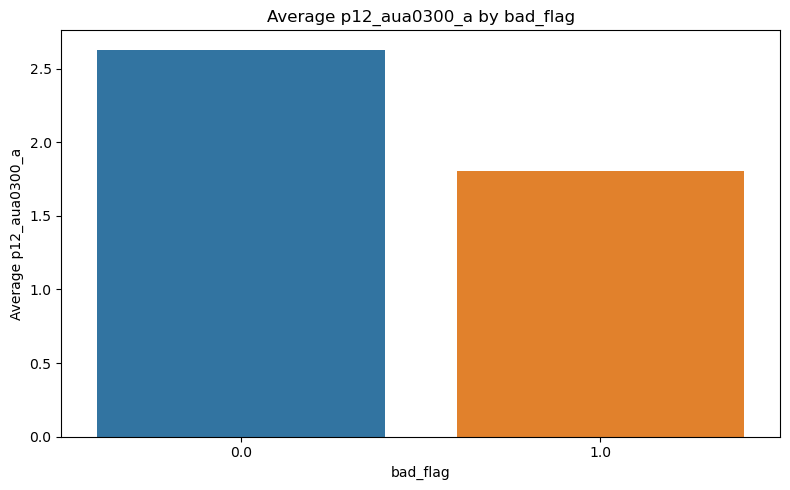

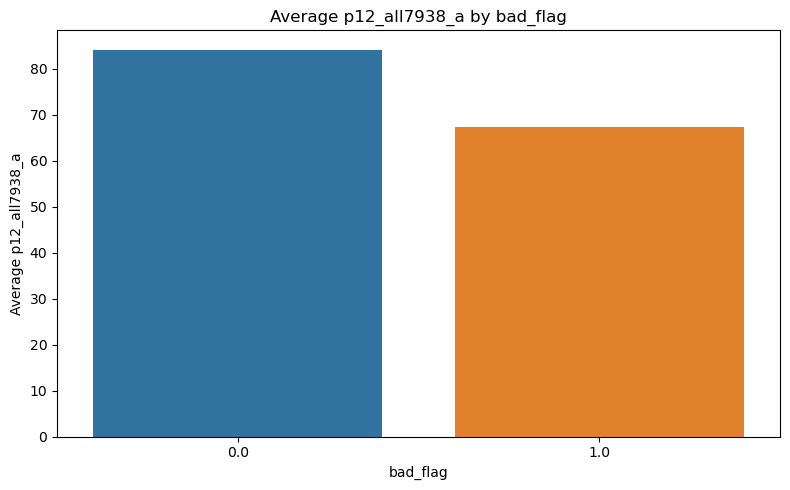

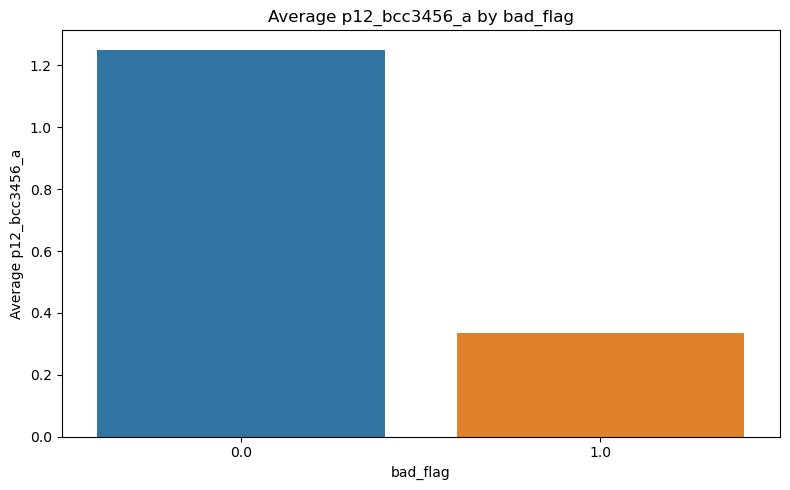

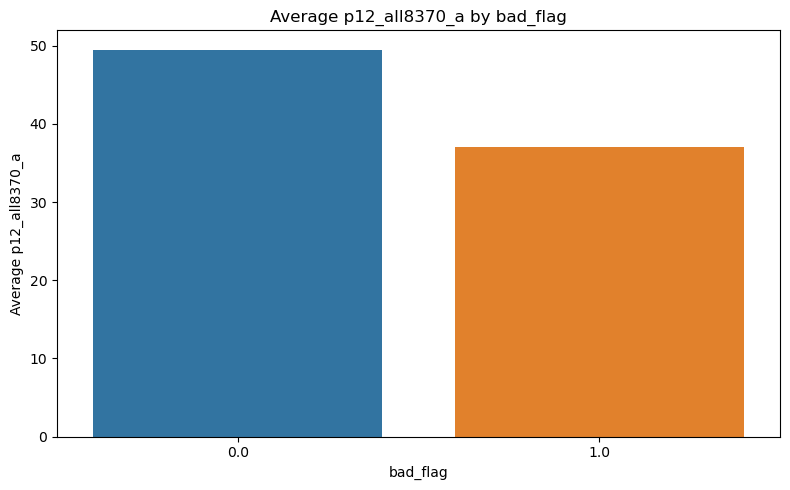

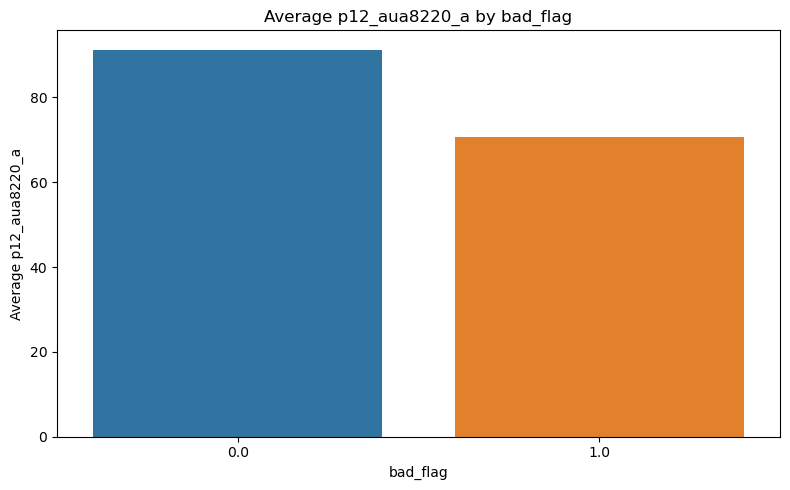

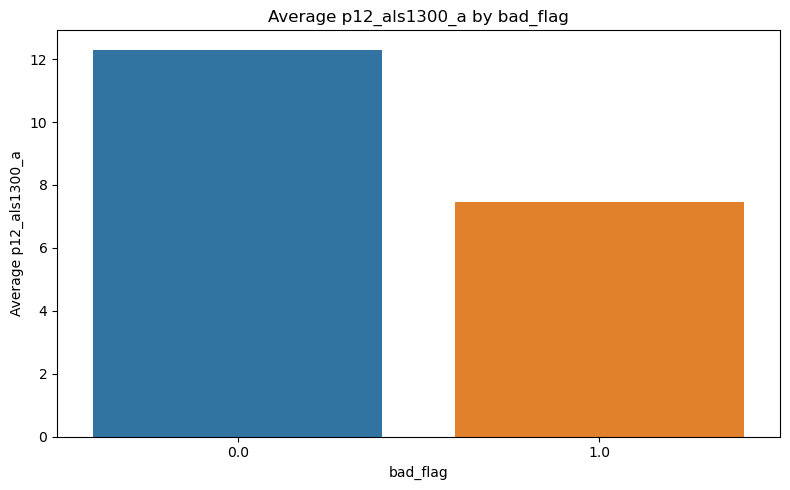

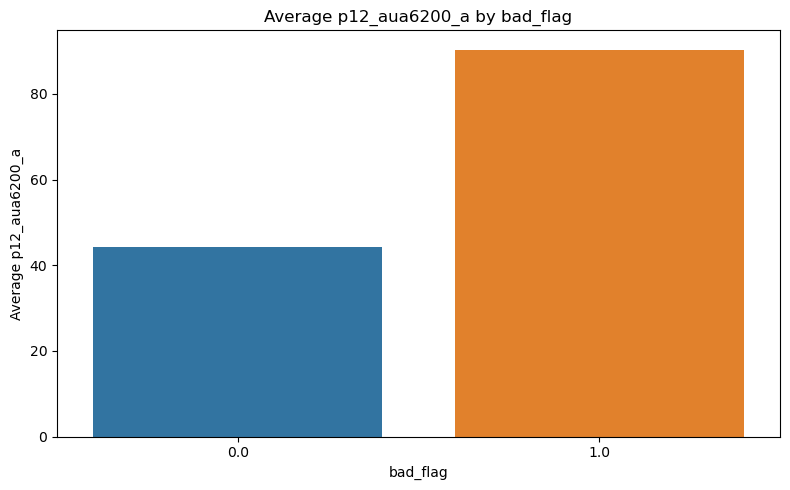

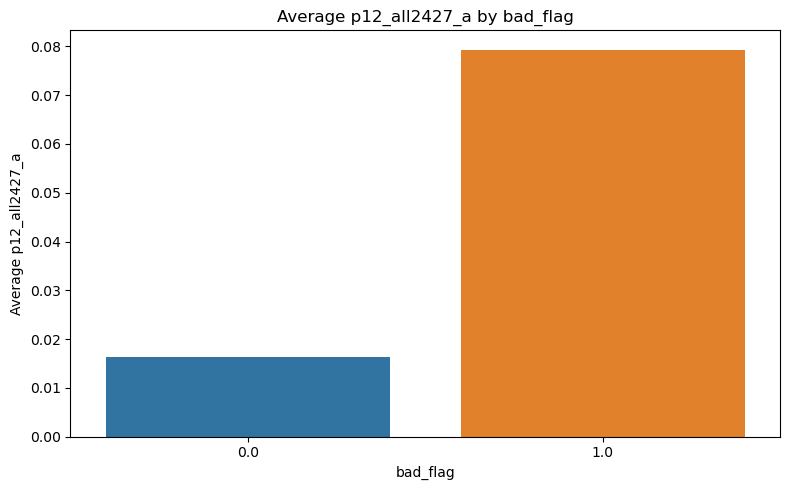

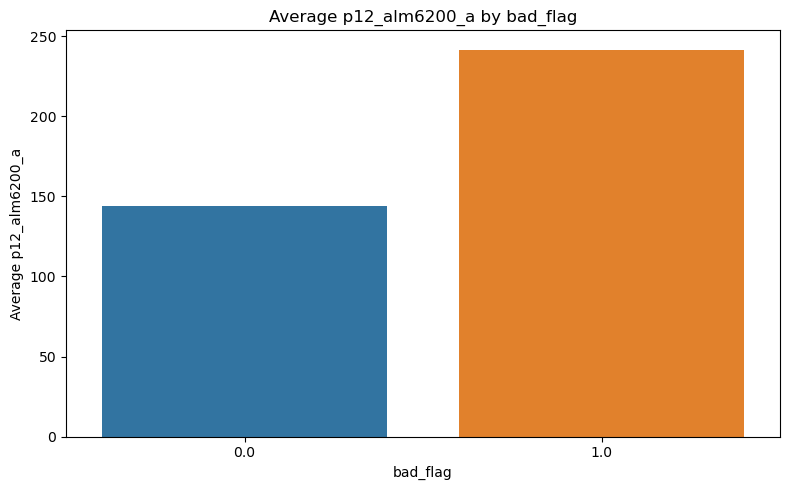

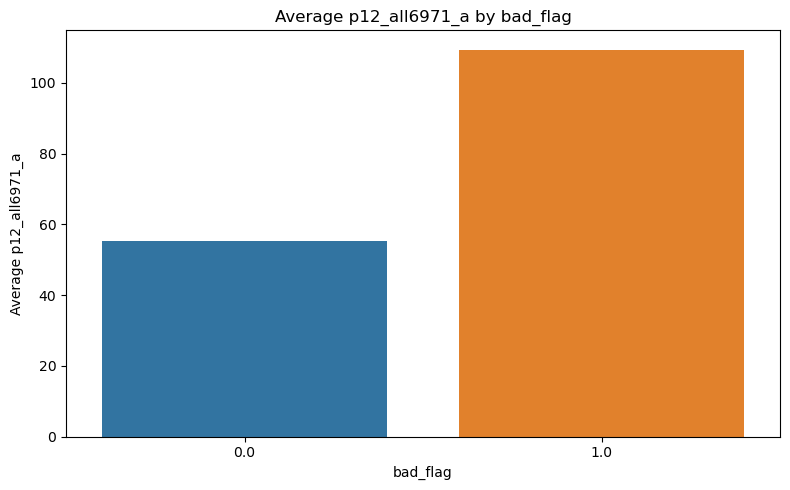

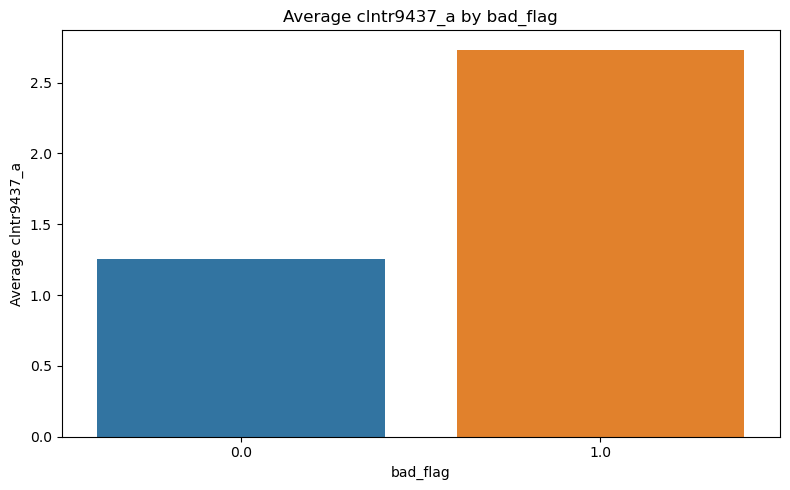

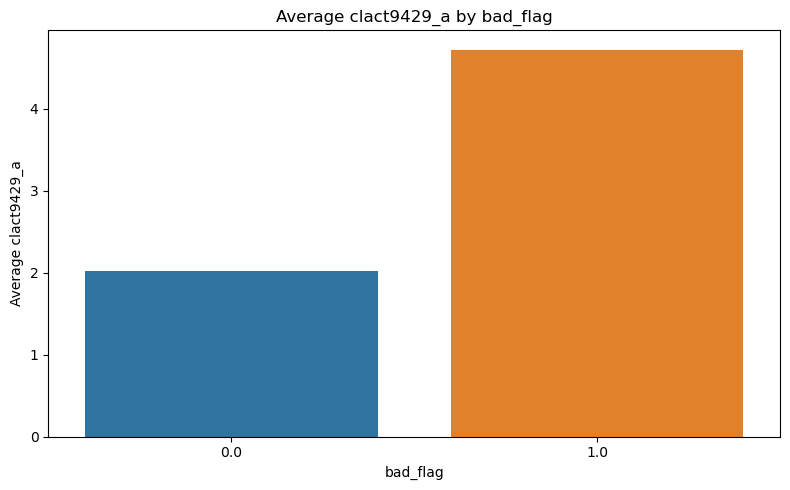

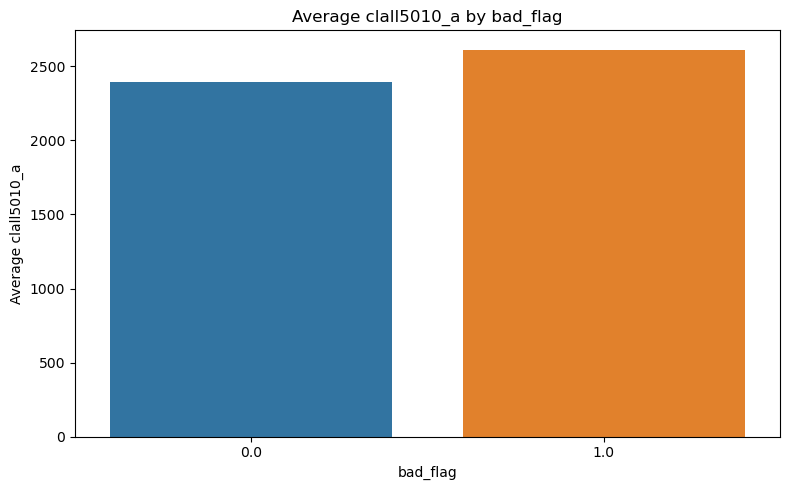

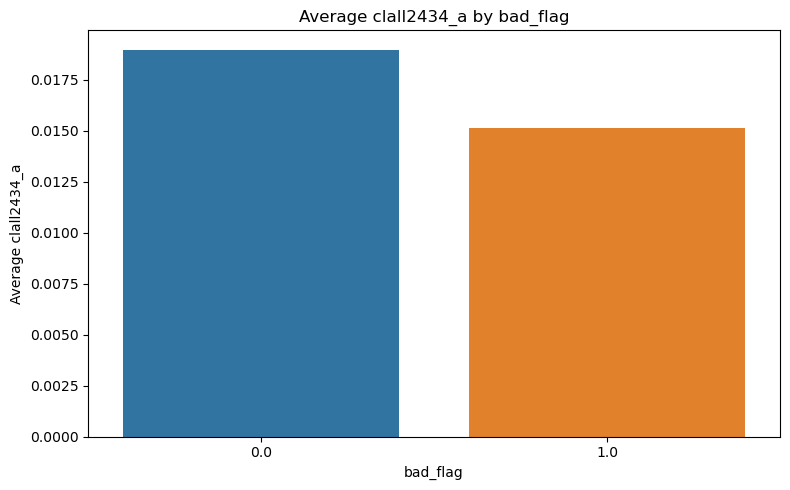

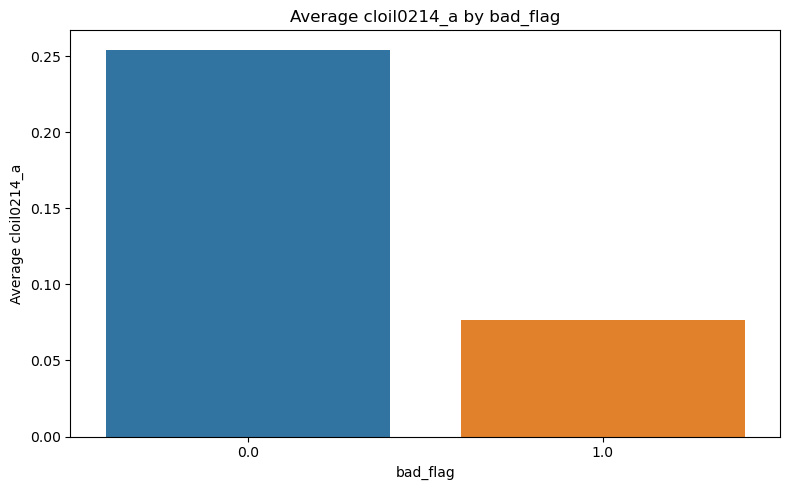

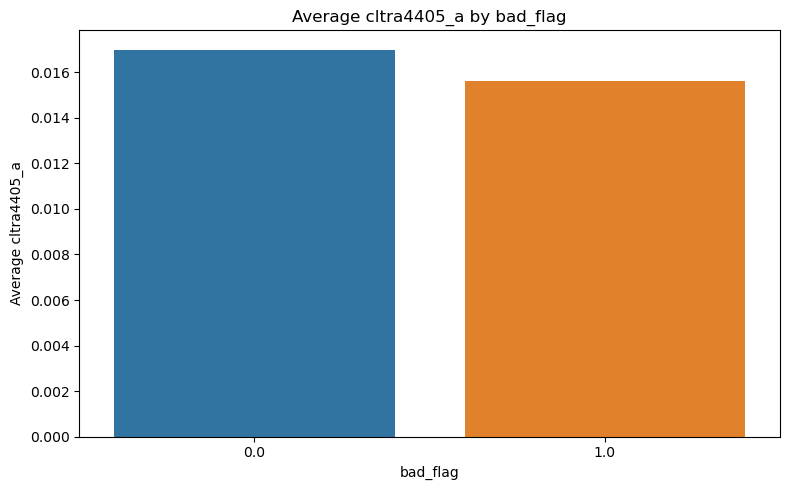

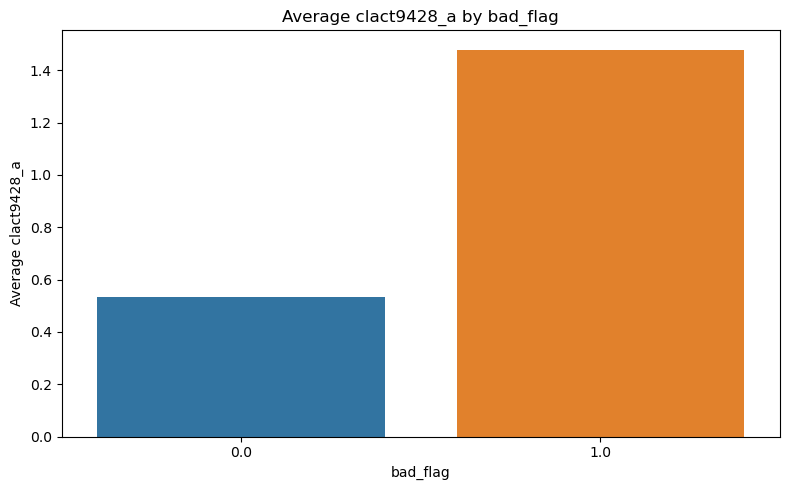

In [39]:
# Bi-variate analysis of frequency-based features vs bad_flag
freq_features = [col for col in train.columns if '_a' in col and train[col].dtype in ['float64', 'int64']]
for feature in freq_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='bad_flag', y=feature, data=train, ci=None, estimator='mean')
    plt.title(f"Average {feature} by bad_flag")
    plt.xlabel("bad_flag")
    plt.ylabel(f"Average {feature}")
    plt.tight_layout()
    plt.show()


### Data Preprocessing

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop rows with missing target values 
df = train.dropna(subset=['bad_flag']).copy()
df['bad_flag'] = df['bad_flag'].astype(float).astype(int)

# Drop columns with >50% missing values (already done in EDA, repeat if needed)
missing_pct = df.isnull().mean()
drop_cols = missing_pct[missing_pct > 0.5].index
df = df.drop(columns=drop_cols)

# Identify column types
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('bad_flag', errors='ignore')
cat_cols = ['Gender', 'Race', 'collateral_dlrinput_newused_1req']
status_cols = [col for col in df.columns if col.endswith('_a') and col not in num_cols and col not in cat_cols]


# Fill missing values
# Median for continuous/numeric
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Mode for categorical/status
for col in cat_cols + status_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


#Encode categorical variables
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


# Define features and target
X = df.drop(columns=['bad_flag', 'aprv_flag'], errors='ignore')
y = df['bad_flag']

#  Standardize continuous features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [44]:
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

print("X_train sample:")
print(X_train.head())
print("\nX_val sample:")
print(X_val.head())

print("\ny_train distribution:")
print(y_train.value_counts(normalize=True))
print("\ny_val distribution:")
print(y_val.value_counts(normalize=True))


Training features shape: (17078, 32)
Validation features shape: (4270, 32)
Training labels shape: (17078,)
Validation labels shape: (4270,)
X_train sample:
           fico  amtfinanced_1req  collateral_dlrinput_newused_1req  pti_1req  \
20528  0.479500         -0.065227                                 1 -0.972886   
2263   0.978255         -0.178412                                 1 -0.461298   
10502 -1.588509          0.264871                                 1  0.439178   
18434  0.661971          3.048387                                 1 -1.353456   
20607  1.720305         -0.151600                                 1  0.682494   

       ltv_1req  p12_reh7120_a  p12_bcx7110_a  p12_all7170_a  p12_aut7110_a  \
20528  0.458133      -1.448323      -0.263411      -0.235518       0.153427   
2263  -0.691877      -0.101778      -0.131839      -0.235518       0.153427   
10502  0.662313      -0.326202      -0.888379       5.831338      -0.439691   
18434 -0.194726      -0.410361      -0.95

## Logistic Regression Model
We will fit a Logistic Regression Model, assess its performance and interpret the results 

### Logistic Regression without Resampling

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train logistic regression with class imbalance handling
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
logreg.fit(X_train, y_train)

# predictions
y_pred = logreg.predict(X_val)               # Class labels (0 or 1)
y_prob = logreg.predict_proba(X_val)[:, 1]   # Probability of class 1 (good credit)

# Evaluation
print("Logistic Regression WITHOUT Resampling::")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_val, y_prob))


Logistic Regression WITHOUT Resampling::
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      4078
           1       0.10      0.75      0.18       192

    accuracy                           0.69      4270
   macro avg       0.54      0.72      0.50      4270
weighted avg       0.94      0.69      0.78      4270

Confusion Matrix:
 [[2813 1265]
 [  48  144]]
AUC-ROC Score: 0.7957996158247507


In [51]:
# Extract coefficients from the fitted logistic regression model
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute coefficient value
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
top_features = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Display top 10 features
print(top_features[['Feature', 'Coefficient']])


                             Feature  Coefficient
0                               fico    -0.977912
2   collateral_dlrinput_newused_1req     0.514460
4                           ltv_1req     0.490964
15                     p12_all7517_a     0.202070
13                     p12_rev1300_a    -0.175893
30                            Gender    -0.164469
25                     p12_als1300_a    -0.158050
8                      p12_aut7110_a     0.153565
19                     p12_pil8120_a    -0.127102
14                     p12_bca8370_a    -0.114522


#### Logistic Regression With SMOTE Resampling

In [49]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

#  Train Logistic Regression on oversampled data
logreg_sm = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg_sm.fit(X_train_sm, y_train_sm)

# Predict on original validation set
y_pred_sm = logreg_sm.predict(X_val)
y_prob_sm = logreg_sm.predict_proba(X_val)[:, 1]

# Evaluate
print("Logistic Regression WITH SMOTE Resampling::")
print("Classification Report (SMOTE):\n", classification_report(y_val, y_pred_sm))
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_val, y_pred_sm))
print("AUC-ROC Score (SMOTE):", roc_auc_score(y_val, y_prob_sm))




Logistic Regression WITH SMOTE Resampling::
Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      4078
           1       0.11      0.71      0.18       192

    accuracy                           0.72      4270
   macro avg       0.54      0.72      0.51      4270
weighted avg       0.94      0.72      0.80      4270

Confusion Matrix (SMOTE):
 [[2925 1153]
 [  55  137]]
AUC-ROC Score (SMOTE): 0.7786062408043157


In [52]:
# Extract coefficients from SMOTE-trained logistic regression
coef_sm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg_sm.coef_[0]
})

# Sort by absolute value of coefficient
coef_sm_df['Abs_Coefficient'] = np.abs(coef_sm_df['Coefficient'])
top_sm_features = coef_sm_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Display top 10 features
print(top_sm_features[['Feature', 'Coefficient']])


          Feature  Coefficient
0            fico    -1.182573
30         Gender    -0.959768
4        ltv_1req     0.568306
25  p12_als1300_a    -0.256708
19  p12_pil8120_a    -0.241413
13  p12_rev1300_a    -0.235431
8   p12_aut7110_a     0.202864
20  p12_aua0300_a    -0.163835
15  p12_all7517_a     0.138557
22  p12_bcc3456_a    -0.136030


#### ROC curve 

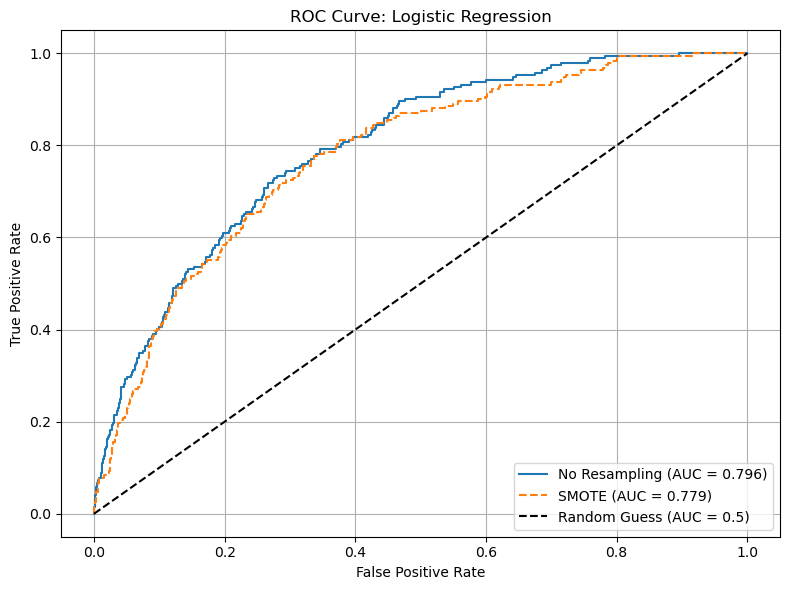

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curves and AUCs
fpr1, tpr1, _ = roc_curve(y_val, y_prob)       # No Resampling
fpr2, tpr2, _ = roc_curve(y_val, y_prob_sm)    # With SMOTE

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'No Resampling (AUC = {auc1:.3f})')
plt.plot(fpr2, tpr2, label=f'SMOTE (AUC = {auc2:.3f})', linestyle='--')

# Reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

# Labels and formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Machine Learning (ML) model: Decision Trees and Random Forest

Without Resampling

Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4078
           1       0.14      0.14      0.14       192

    accuracy                           0.92      4270
   macro avg       0.55      0.55      0.55      4270
weighted avg       0.92      0.92      0.92      4270

Confusion Matrix:
 [[3914  164]
 [ 165   27]]
AUC-ROC Score: 0.5502046039725356

Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4078
           1       0.00      0.00      0.00       192

    accuracy                           0.95      4270
   macro avg       0.48      0.50      0.49      4270
weighted avg       0.91      0.95      0.93      4270

Confusion Matrix:
 [[4077    1]
 [ 192    0]]
AUC-ROC Score: 0.785194565350662


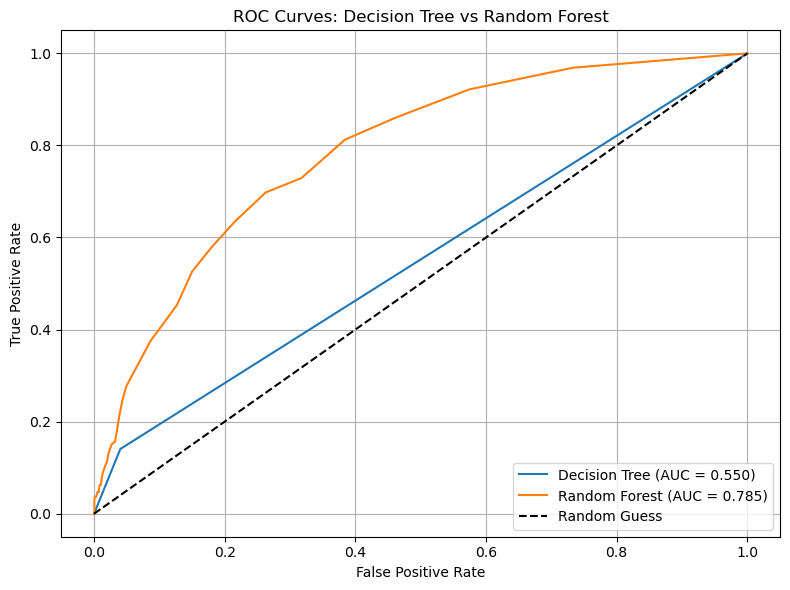

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


#train a Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_val)
y_prob_dt = dt.predict_proba(X_val)[:, 1]

print("Decision Tree")
print("Classification Report:\n", classification_report(y_val, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("AUC-ROC Score:", roc_auc_score(y_val, y_prob_dt))

# Feature importance
dt_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)


#Train a RandomForrest Model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:, 1]

print("\nRandom Forest")
print("Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_val, y_prob_rf))

# Feature importance
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)


# Plot ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_val, y_prob_dt):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_val, y_prob_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Decision Tree vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


With Resampling (Using SMOTE)

Decision Tree with SMOTE
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      4078
           1       0.10      0.19      0.13       192

    accuracy                           0.88      4270
   macro avg       0.53      0.55      0.53      4270
weighted avg       0.92      0.88      0.90      4270

Confusion Matrix:
 [[3739  339]
 [ 156   36]]
AUC-ROC Score: 0.5521855076017655

Random Forest with SMOTE
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4078
           1       0.18      0.08      0.11       192

    accuracy                           0.94      4270
   macro avg       0.57      0.53      0.54      4270
weighted avg       0.92      0.94      0.93      4270

Confusion Matrix:
 [[4006   72]
 [ 176   16]]
AUC-ROC Score: 0.7675094766633973


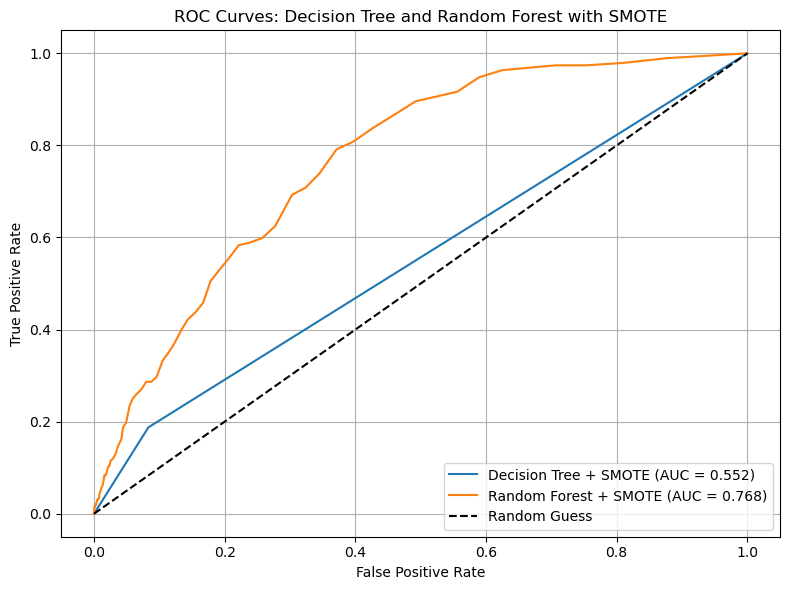

In [55]:
# Apply SMOTE to training data

# 2. Train Decision Tree on SMOTE data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)

# Predict on validation data
y_pred_dt = dt.predict(X_val)
y_prob_dt = dt.predict_proba(X_val)[:, 1]

# Evaluation for Decision Tree
print("Decision Tree with SMOTE")
print("Classification Report:\n", classification_report(y_val, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("AUC-ROC Score:", roc_auc_score(y_val, y_prob_dt))

# 3. Train Random Forest on SMOTE data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predict on validation data
y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:, 1]

# Evaluation for Random Forest
print("\nRandom Forest with SMOTE")
print("Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_val, y_prob_rf))

# 4. Plot ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree + SMOTE (AUC = {roc_auc_score(y_val, y_prob_dt):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest + SMOTE (AUC = {roc_auc_score(y_val, y_prob_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Decision Tree and Random Forest with SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Apply LIME to Logistic Regression

In [58]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [59]:
import lime
import lime.lime_tabular
logreg.fit(X_train, y_train)

# LIME Explainer setup
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Bad Credit', 'Good Credit'],
    mode='classification'
)

# Explain a single prediction
i = 5  # index of the applicant you want to explain
exp = explainer.explain_instance(
    data_row=X_val.iloc[i].values,
    predict_fn=logreg.predict_proba,
    num_features=6
)


exp.show_in_notebook(show_table=True, show_all=False)
exp.save_to_file('lime_explanation_applicant_5.html')


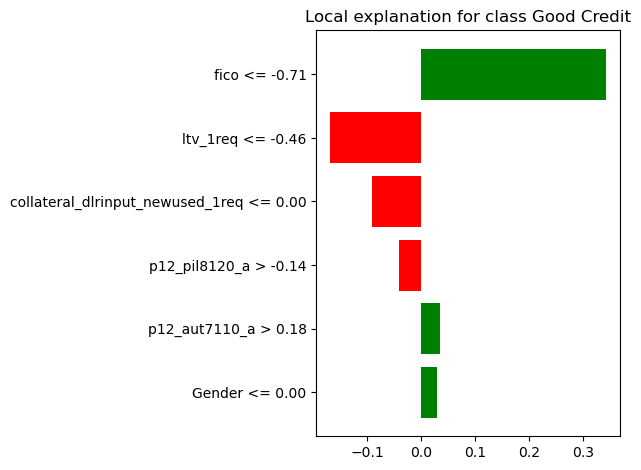

In [60]:
fig = exp.as_pyplot_figure()
fig.tight_layout()
plt.show()


### Apply model and Analyze Approval Biasness

In [65]:
#Copy and apply preprocessing to test set
test_proc = test.copy()

# Drop the same columns as in training
test_proc = test_proc.drop(columns=drop_cols, errors='ignore')

# Fill missing values
# Median for numerical
test_proc[num_cols] = test_proc[num_cols].fillna(df[num_cols].median())

# Mode for categorical/status
for col in cat_cols + status_cols:
    if col in test_proc.columns:
        test_proc[col] = test_proc[col].fillna(df[col].mode()[0])

# Encode categorical variables (use same LabelEncoder logic)
for col in cat_cols:
    if col in test_proc.columns:
        test_proc[col] = LabelEncoder().fit_transform(test_proc[col].astype(str))

# Keep original Gender and Race for analysis
test_proc['Gender_raw'] = test['Gender']
test_proc['Race_raw'] = test['Race']

# Drop unused columns and scale numerical features
X_test = test_proc[X_train.columns]
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Use scaler from training

# Step 2: Predict using your trained model (e.g., LogisticRegression)
test['predicted_class'] = logreg.predict(X_test)

# Step 3: Calculate approval rate by Gender
approval_by_gender = test.groupby('Gender')['predicted_class'].mean().reset_index()
approval_by_gender.columns = ['Gender', 'Approval Rate (%)']
approval_by_gender['Approval Rate (%)'] = (approval_by_gender['Approval Rate (%)'] * 100).round(1)

# Step 4: Calculate approval rate by Race
approval_by_race = test.groupby('Race')['predicted_class'].mean().reset_index()
approval_by_race.columns = ['Race', 'Approval Rate (%)']
approval_by_race['Approval Rate (%)'] = (approval_by_race['Approval Rate (%)'] * 100).round(1)

# Step 5: Display
print("Approval Rate by Gender:\n", approval_by_gender)
print("\nApproval Rate by Race:\n", approval_by_race)


C:\Users\Asus\AppData\Local\Temp\ipykernel_23112\1443970083.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = scaler.transform(X_test[num_cols])  # Use scaler from training


Approval Rate by Gender:
       Gender  Approval Rate (%)
0     Female               35.5
1       Male               32.2
2  Undefined               30.1

Approval Rate by Race:
        Race  Approval Rate (%)
0     Asian               29.5
1     Black               36.2
2  Hispanic               34.9
3     Other               37.0
4     White               31.9


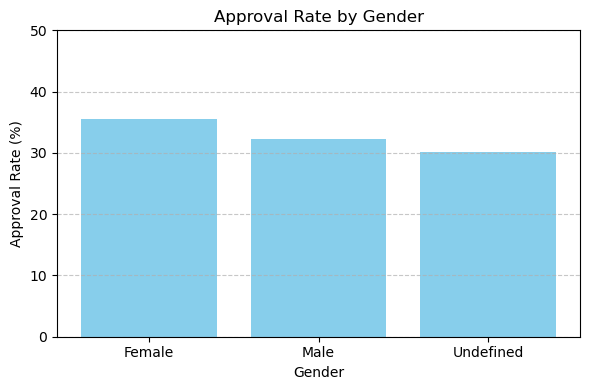

In [66]:


# Bar chart for approval rate by Gender
plt.figure(figsize=(6, 4))
plt.bar(approval_by_gender['Gender'], approval_by_gender['Approval Rate (%)'], color='skyblue')
plt.title('Approval Rate by Gender')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Gender')
plt.ylim(0, 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("approval_rate_by_gender.png", dpi=300)
plt.show()


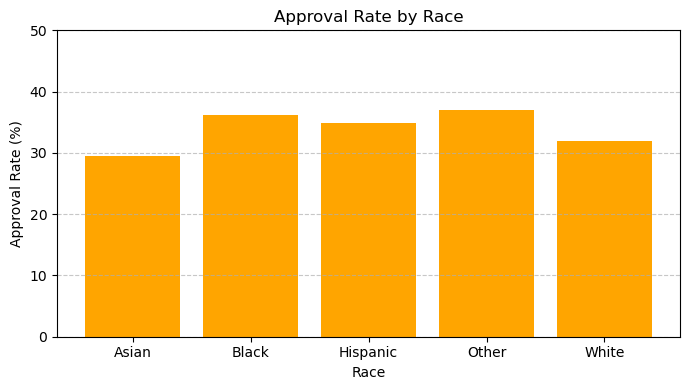

In [67]:
# Bar chart for approval rate by Race
plt.figure(figsize=(7, 4))
plt.bar(approval_by_race['Race'], approval_by_race['Approval Rate (%)'], color='orange')
plt.title('Approval Rate by Race')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Race')
plt.ylim(0, 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("approval_rate_by_race.png", dpi=300)
plt.show()
